<a href="https://colab.research.google.com/github/janel-dsbc/Deep-Dive-Projects/blob/main/Capstone_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Problem Question: What are the key economic indicators correlating with homelessness? The key economic indicators are the features with PIT total homelessness as the target.

# Roadmap

1. Create a multiple linear regression model.
2. Best subset selection for a multiple linear regression model.
3. Lasso
4. Ridge regression
4. Random Forest
5. XGBoost





# Imports

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import graphviz
from IPython.display import display
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Data Source + Data Dictionary

Data Source:
https://www.huduser.gov/portal/datasets/hpmd.html

Data Dictionary:  https://www.huduser.gov/portal/sites/default/files/xls/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20Dictionary.xlsx

Model: https://bookdown.org/bfischer_su/data_3320_bookdown/homeless.html

In [2]:
data_dict1 = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20Dictionary.xlsx')

In [3]:
data_dict1

Associated Domain                 Variable  \
0          Identifier                     year   
1          Identifier                cocnumber   
2             Outcome    pit_tot_shelt_pit_hud   
3             Outcome  pit_tot_unshelt_pit_hud   
4             Outcome    pit_tot_hless_pit_hud   
..                ...                      ...   
327          Subgroup   sub_west_coast_all_urb   
328          Subgroup          sub_west_census   
329          Subgroup               major_city   
330          Subgroup                 suburban   
331          Subgroup                    rural   

                                        Variable Label Derived  \
0                                                 year      No   
1                             continuum of care number      No   
2                            total sheltered - HUD PIT      No   
3                          total unsheltered - HUD PIT      No   
4                             total homeless - HUD PIT      No   
..                                                 ...     ...   
327  indicator for suburban or major city/largely u...      No   
328                     indicator for west region CoCs      No   
329      indicator for major city or largely urban CoC      No   
330                 indicator for largely suburban CoC      No   
331                    indicator for largely rural CoC      No   

    Source or Root Variable Table Name(s)  
0                       NaN           NaN  
1                       HUD           NaN  
2                   HUD PIT           NaN  
3                   HUD PIT           NaN  
4                   HUD PIT           NaN  
..                      ...           ...  
327                     NaN           NaN  
328                     NaN           NaN  
329                     HUD           NaN  
330                     HUD           NaN  
331                     HUD           NaN  

[332 rows x 6 columns]

In [4]:
data_dict2 = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20Dictionary.xlsx', sheet_name=1)

In [5]:
data_dict2

Variable  \
0           dem_age_boom_census   
1        dem_soc_ed_bach_acs5yr   
2      dem_soc_ed_hsgrad_acs5yr   
3      dem_soc_ed_lesshs_acs5yr   
4    dem_soc_ed_somecoll_acs5yr   
..                          ...   
165        d_dem_soc_ed_bach_xt   
166      d_dem_soc_singadult_xt   
167     d_dem_soc_singparent_xt   
168            d_dem_soc_vet_xt   
169      dem_soc_ed_lessbach_xt   

                                             Numerator  \
0              Estimated population aged 45-69 in 2010   
1    Population 25 through 64 years with a bachelor...   
2    Population 25 through 64 years with a high sch...   
3    Population 25 through 64 years that did not gr...   
4     Population 25 through 64 years with some college   
..                                                 ...   
165  Population 25 through 64 years with a bachelor...   
166                                1-person households   
167  Population under 18 living with a single paren...   
168               Veteran population 25 years and over   
169  Population 25 through 64 years without a bache...   

                                     Denominator  
0                     Estimated total population  
1                 Population 25 through 64 years  
2                 Population 25 through 64 years  
3                 Population 25 through 64 years  
4                 Population 25 through 64 years  
..                                           ...  
165               Population 25 through 64 years  
166                             Total households  
167      Population under 18 years in households  
168  Total civilian population 25 years and over  
169               Population 25 through 64 years  

[170 rows x 3 columns]

Reading in the data

In [6]:
df = pd.read_csv('https://www.huduser.gov/portal/sites/default/files/xls/05b_analysis_file_update.csv')

# EDA

In [7]:
df.head()

year cocnumber  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0  2010    AK-500                 1113.0                    118.0   
1  2011    AK-500                 1082.0                    141.0   
2  2012    AK-500                 1097.0                     50.0   
3  2013    AK-500                 1070.0                     52.0   
4  2014    AK-500                  970.0                     53.0   

   pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
0                 1231.0                  633.0                    107.0   
1                 1223.0                  677.0                    117.0   
2                 1147.0                  756.0                     35.0   
3                 1122.0                  792.0                     52.0   
4                 1023.0                  688.0                     48.0   

   pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
0                  740.0                     480.0   
1                  794.0                     405.0   
2                  791.0                     341.0   
3                  844.0                     278.0   
4                  736.0                     282.0   

   pit_perfam_unshelt_pit_hud  ...  sub_high_cost_rent75  \
0                        11.0  ...                     1   
1                        24.0  ...                     1   
2                        15.0  ...                     1   
3                         0.0  ...                     1   
4                         5.0  ...                     1   

   sub_high_cost_homeval75  sub_high_rent_share75  tight_high_cost_rental_mkt  \
0                        1                      1                           3   
1                        1                      0                           3   
2                        1                      1                           3   
3                        1                      0                           3   
4                        1                      1                           3   

   sub_tight_high_cost_rent  sub_west_coast_all_urb  sub_west_census  \
0                         1                       1                1   
1                         1                       1                1   
2                         1                       1                1   
3                         1                       1                1   
4                         1                       1                1   

   major_city  suburban  rural  
0           1         0      0  
1           1         0      0  
2           1         0      0  
3           1         0      0  
4           1         0      0  

[5 rows x 332 columns]

In [8]:
df.tail()

year cocnumber  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
3003  2013    WY-500                  501.0                    452.0   
3004  2014    WY-500                  563.0                    194.0   
3005  2015    WY-500                  507.0                    291.0   
3006  2016    WY-500                  491.0                    366.0   
3007  2017    WY-500                  510.0                    363.0   

      pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
3003                  953.0                  306.0                    371.0   
3004                  757.0                  327.0                    136.0   
3005                  798.0                  292.0                    208.0   
3006                  857.0                  277.0                    240.0   
3007                  873.0                  383.0                    239.0   

      pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
3003                  677.0                     195.0   
3004                  463.0                     236.0   
3005                  500.0                     215.0   
3006                  517.0                     214.0   
3007                  622.0                     127.0   

      pit_perfam_unshelt_pit_hud  ...  sub_high_cost_rent75  \
3003                        81.0  ...                     0   
3004                        58.0  ...                     1   
3005                        83.0  ...                     0   
3006                       126.0  ...                     1   
3007                       124.0  ...                     0   

      sub_high_cost_homeval75  sub_high_rent_share75  \
3003                        0                      0   
3004                        1                      1   
3005                        0                      0   
3006                        1                      1   
3007                        0                      0   

      tight_high_cost_rental_mkt  sub_tight_high_cost_rent  \
3003                           0                         0   
3004                           3                         1   
3005                           0                         0   
3006                           3                         1   
3007                           0                         0   

      sub_west_coast_all_urb  sub_west_census  major_city  suburban  rural  
3003                       0                1           0         0      1  
3004                       0                1           0         0      1  
3005                       0                1           0         0      1  
3006                       0                1           0         0      1  
3007                       0                1           0         0      1  

[5 rows x 332 columns]

In [9]:
df.describe().transpose()

count         mean          std     min      25%  \
year                     3008.0  2013.500000     2.291669  2010.0  2011.75   
pit_tot_shelt_pit_hud    2994.0  1033.852037  3445.807044     3.0   224.00   
pit_tot_unshelt_pit_hud  2994.0   526.581830  1742.313472     0.0    36.25   
pit_tot_hless_pit_hud    2994.0  1560.433868  4313.387045     7.0   320.25   
pit_ind_shelt_pit_hud    2994.0   540.342351  1367.938173     0.0   120.25   
...                         ...          ...          ...     ...      ...   
sub_west_coast_all_urb   3008.0     0.140957     0.348036     0.0     0.00   
sub_west_census          3008.0     0.194149     0.395610     0.0     0.00   
major_city               3008.0     0.276596     0.447389     0.0     0.00   
suburban                 3008.0     0.425532     0.494506     0.0     0.00   
rural                    3008.0     0.297872     0.457399     0.0     0.00   

                            50%      75%      max  
year                     2013.5  2015.25   2017.0  
pit_tot_shelt_pit_hud     445.5   961.50  72565.0  
pit_tot_unshelt_pit_hud   114.0   418.25  42828.0  
pit_tot_hless_pit_hud     679.0  1468.00  76501.0  
pit_ind_shelt_pit_hud     253.0   560.00  27188.0  
...                         ...      ...      ...  
sub_west_coast_all_urb      0.0     0.00      1.0  
sub_west_census             0.0     0.00      1.0  
major_city                  0.0     1.00      1.0  
suburban                    0.0     1.00      1.0  
rural                       0.0     1.00      1.0  

[330 rows x 8 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Columns: 332 entries, year to rural
dtypes: float64(257), int64(73), object(2)
memory usage: 7.6+ MB


In [11]:
object_columns = df.select_dtypes(include='object').columns

print(object_columns)


Index(['cocnumber', 'state_abr'], dtype='object')


In [12]:
df['cocnumber'][:10]

0    AK-500
1    AK-500
2    AK-500
3    AK-500
4    AK-500
5    AK-500
6    AK-500
7    AK-500
8    AK-501
9    AK-501
Name: cocnumber, dtype: object

In [13]:
df['state_abr'][:10]

0    AK
1    AK
2    AK
3    AK
4    AK
5    AK
6    AK
7    AK
8    AK
9    AK
Name: state_abr, dtype: object

In [14]:
df.columns.to_list()


['year',
 'cocnumber',
 'pit_tot_shelt_pit_hud',
 'pit_tot_unshelt_pit_hud',
 'pit_tot_hless_pit_hud',
 'pit_ind_shelt_pit_hud',
 'pit_ind_unshelt_pit_hud',
 'pit_ind_hless_pit_hud',
 'pit_perfam_shelt_pit_hud',
 'pit_perfam_unshelt_pit_hud',
 'pit_perfam_hless_pit_hud',
 'pit_ind_chronic_hless_pit_hud',
 'pit_perfam_chronic_hless_pit_hud',
 'pit_vet_hless_pit_hud',
 'econ_urb_urbanicity',
 'coctag',
 'panelvar',
 'hou_pol_totalind_hud',
 'hou_pol_totalday_hud',
 'hou_pol_totalexit_hud',
 'hou_pol_numret6mos_hud',
 'hou_pol_numret12mos_hud',
 'hou_pol_fedfundcoc',
 'hou_pol_fund_project',
 'hou_pol_bed_es_hic_hud',
 'hou_pol_bed_oph_hic_hud',
 'hou_pol_bed_psh_hic_hud',
 'hou_pol_bed_rrh_hic_hud',
 'hou_pol_bed_sh_hic_hud',
 'hou_pol_bed_th_hic_hud',
 'hou_pol_perm_bed_hic_hud',
 'hou_pol_temp_bed_hic_hud',
 'dem_pop_pop_census',
 'dem_pop_male_census',
 'dem_pop_female_census',
 'dem_pop_child_census',
 'dem_pop_adult_census',
 'dem_pop_senior_census',
 'dem_soc_white_census',
 'dem_s

In [15]:
df1 = df.copy()

In [16]:
df1 = df1.drop(columns = ['state_abr','cocnumber'])

In [17]:
df1.isna()

year  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0     False                  False                    False   
1     False                  False                    False   
2     False                  False                    False   
3     False                  False                    False   
4     False                  False                    False   
...     ...                    ...                      ...   
3003  False                  False                    False   
3004  False                  False                    False   
3005  False                  False                    False   
3006  False                  False                    False   
3007  False                  False                    False   

      pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
0                     False                  False                    False   
1                     False                  False                    False   
2                     False                  False                    False   
3                     False                  False                    False   
4                     False                  False                    False   
...                     ...                    ...                      ...   
3003                  False                  False                    False   
3004                  False                  False                    False   
3005                  False                  False                    False   
3006                  False                  False                    False   
3007                  False                  False                    False   

      pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   
...                     ...                       ...   
3003                  False                     False   
3004                  False                     False   
3005                  False                     False   
3006                  False                     False   
3007                  False                     False   

      pit_perfam_unshelt_pit_hud  pit_perfam_hless_pit_hud  ...  \
0                          False                     False  ...   
1                          False                     False  ...   
2                          False                     False  ...   
3                          False                     False  ...   
4                          False                     False  ...   
...                          ...                       ...  ...   
3003                       False                     False  ...   
3004                       False                     False  ...   
3005                       False                     False  ...   
3006                       False                     False  ...   
3007                       False                     False  ...   

      sub_high_cost_rent75  sub_high_cost_homeval75  sub_high_rent_share75  \
0                    False                    False                  False   
1                    False                    False                  False   
2                    False                    False                  False   
3                    False                    False                  False   
4                    False                    False                  False   
...                    ...                      ...                    ...   
3003                 False                    False                  False   
3004                 False                    False                  False   
3005                 False                    False                  False   
3006                 False     

In [18]:
nan_cols = [i for i in df1.columns if df1[i].isnull().any()]

In [19]:
nan_cols

['pit_tot_shelt_pit_hud',
 'pit_tot_unshelt_pit_hud',
 'pit_tot_hless_pit_hud',
 'pit_ind_shelt_pit_hud',
 'pit_ind_unshelt_pit_hud',
 'pit_ind_hless_pit_hud',
 'pit_perfam_shelt_pit_hud',
 'pit_perfam_unshelt_pit_hud',
 'pit_perfam_hless_pit_hud',
 'pit_ind_chronic_hless_pit_hud',
 'pit_perfam_chronic_hless_pit_hud',
 'pit_vet_hless_pit_hud',
 'hou_pol_totalind_hud',
 'hou_pol_totalday_hud',
 'hou_pol_totalexit_hud',
 'hou_pol_numret6mos_hud',
 'hou_pol_numret12mos_hud',
 'hou_pol_fund_project',
 'hou_pol_bed_es_hic_hud',
 'hou_pol_bed_oph_hic_hud',
 'hou_pol_bed_psh_hic_hud',
 'hou_pol_bed_rrh_hic_hud',
 'hou_pol_bed_sh_hic_hud',
 'hou_pol_bed_th_hic_hud',
 'hou_pol_perm_bed_hic_hud',
 'hou_pol_temp_bed_hic_hud',
 'dem_age_boom_census',
 'total_rent_inventory_acs5yr',
 'dem_soc_ed_bach_acs5yr',
 'dem_soc_ed_hsgrad_acs5yr',
 'dem_soc_ed_lesshs_acs5yr',
 'dem_soc_ed_somecoll_acs5yr',
 'dem_soc_vet_acs5yr',
 'dem_soc_singparent_acs5yr',
 'dem_health_ins_acs5yr',
 'econ_labor_topskilled_

In [20]:

econ_columns_filter = [col for col in df1.columns if 'econ' in col]
df_econ = df[econ_columns_filter]


In [21]:
df_econ

econ_urb_urbanicity  econ_labor_topskilled_acs5yr  \
0                       3                           NaN   
1                       3                           NaN   
2                       3                      0.975088   
3                       3                           NaN   
4                       3                           NaN   
...                   ...                           ...   
3003                    1                           NaN   
3004                    1                           NaN   
3005                    1                           NaN   
3006                    1                           NaN   
3007                    1                      0.981475   

      econ_labor_midskilled_acs5yr  econ_labor_unskilled_acs5yr  \
0                              NaN                          NaN   
1                              NaN                          NaN   
2                         0.926234                     0.876199   
3                              NaN                          NaN   
4                              NaN                          NaN   
...                            ...                          ...   
3003                           NaN                          NaN   
3004                           NaN                          NaN   
3005                           NaN                          NaN   
3006                           NaN                          NaN   
3007                      0.956278                     0.885755   

      econ_labor_incineq_acs5yr  econ_labor_medinc_acs5yr  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                      0.413200              75485.000000   
3                           NaN                       NaN   
4                           NaN                       NaN   
...                         ...                       ...   
3003                        NaN                       NaN   
3004                        NaN                       NaN   
3005                        NaN                       NaN   
3006                        NaN                       NaN   
3007                   0.420137              59904.570978   

      econ_labor_pov_acs5yr  econ_sn_cashasst_acs5yr  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                  0.078417                 0.064011   
3                       NaN                      NaN   
4                       NaN                      NaN   
...                     ...                      ...   
3003                    NaN                      NaN   
3004                    NaN                      NaN   
3005                    NaN                      NaN   
3006                    NaN                      NaN   
3007               0.115926                 0.016574   

      econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  ...  \
0                       153834                  143806  ...   
1                       157923                  147539  ...   
2                       159006                  149542  ...   
3                       158380                  149897  ...   
4                       158401                  150169  ...   
...                        ...                     ...  ...   
3003                    307272                  290935  ...   
3004                    306611                  292132  ...   
3005                    306332                  293657  ...   
3006                    304774                  291686  ...   
3007                    300923                  285055  ...   

      econ_labor_incineq_xt  econ_sn_cashasst_xt  ln_econ_labor_medinc_census  \
0                       NaN                  NaN                     4.279579   
1                 41.320000             6.401073                     4.255953   
2                       NaN                  NaN                     4.266012   
3    

In [22]:
df_econ.isnull().sum()

econ_urb_urbanicity                   0
econ_labor_topskilled_acs5yr       2256
econ_labor_midskilled_acs5yr       2256
econ_labor_unskilled_acs5yr        2256
econ_labor_incineq_acs5yr          2256
econ_labor_medinc_acs5yr           2256
econ_labor_pov_acs5yr              2256
econ_sn_cashasst_acs5yr            2256
econ_labor_force_pop_BLS              0
econ_labor_emp_pop_BLS                0
econ_labor_unemp_pop_BLS              0
econ_labor_unemp_rate_BLS             0
econ_labor_pov_pop_census             0
econ_labor_medinc_census              0
econ_sn_ssdi_SSA                      0
econ_sn_ssdi_part_rate_SSA            0
econ_sn_ssi_part_SSA                  0
econ_sn_ssi_pay_SSA                   0
econ_sn_ssi_part_rate_SSA             0
econ_sn_eitc_irs                    376
econ_sn_returns_irs                 376
econ_sn_eitc_irs_share              376
econ_labor_incineq_acs5yr_2012        0
econ_labor_incineq_acs5yr_2017        0
econ_labor_incineq_acs5yr_diff        0


In [23]:
len(df_econ)

3008

In [24]:
nan_cols50 = [i for i in df_econ.columns if df_econ[i].isnull().sum() > 0.50*len(df_econ)]
nan_cols50

['econ_labor_topskilled_acs5yr',
 'econ_labor_midskilled_acs5yr',
 'econ_labor_unskilled_acs5yr',
 'econ_labor_incineq_acs5yr',
 'econ_labor_medinc_acs5yr',
 'econ_labor_pov_acs5yr',
 'econ_sn_cashasst_acs5yr',
 'd_econ_labor_medinc_census',
 'd_econ_labor_unemp_rate_BLS',
 'd_econ_labor_incineq_xt',
 'd_econ_sn_cashasst_xt',
 'd_econ_sn_eitc_irs_share',
 'd_econ_sn_ssdi_part_rate_SSA',
 'd_econ_sn_ssi_part_rate_SSA']

In [25]:
type(nan_cols50[0])

str

In [26]:
df_econ = df_econ.drop(columns = nan_cols50)

In [27]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   econ_urb_urbanicity              3008 non-null   int64  
 1   econ_labor_force_pop_BLS         3008 non-null   int64  
 2   econ_labor_emp_pop_BLS           3008 non-null   int64  
 3   econ_labor_unemp_pop_BLS         3008 non-null   int64  
 4   econ_labor_unemp_rate_BLS        3008 non-null   float64
 5   econ_labor_pov_pop_census        3008 non-null   int64  
 6   econ_labor_medinc_census         3008 non-null   float64
 7   econ_sn_ssdi_SSA                 3008 non-null   int64  
 8   econ_sn_ssdi_part_rate_SSA       3008 non-null   float64
 9   econ_sn_ssi_part_SSA             3008 non-null   int64  
 10  econ_sn_ssi_pay_SSA              3008 non-null   int64  
 11  econ_sn_ssi_part_rate_SSA        3008 non-null   float64
 12  econ_sn_eitc_irs    

In [28]:
df_econ

econ_urb_urbanicity  econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  \
0                       3                    153834                  143806   
1                       3                    157923                  147539   
2                       3                    159006                  149542   
3                       3                    158380                  149897   
4                       3                    158401                  150169   
...                   ...                       ...                     ...   
3003                    1                    307272                  290935   
3004                    1                    306611                  292132   
3005                    1                    306332                  293657   
3006                    1                    304774                  291686   
3007                    1                    300923                  285055   

      econ_labor_unemp_pop_BLS  econ_labor_unemp_rate_BLS  \
0                        10028                   6.518715   
1                        10384                   6.575356   
2                         9464                   5.951977   
3                         8483                   5.356105   
4                         8232                   5.196937   
...                        ...                        ...   
3003                     16337                   5.316788   
3004                     14479                   4.722270   
3005                     12675                   4.137668   
3006                     13088                   4.294330   
3007                     15868                   5.273109   

      econ_labor_pov_pop_census  econ_labor_medinc_census  econ_sn_ssdi_SSA  \
0                         21109                 72.210000              4735   
1                         27351                 70.524000              5040   
2                         24409                 71.237000              5315   
3                         26220                 71.094000              5320   
4                         22753                 76.362000              5230   
...                         ...                       ...               ...   
3003                      66877                 55.974255             12775   
3004                      62119                 59.384858             13105   
3005                      63860                 59.085005             13170   
3006                      60786                 61.199326             13255   
3007                      62415                 61.816666             13325   

      econ_sn_ssdi_part_rate_SSA  econ_sn_ssi_part_SSA  ...  \
0                       1.660273                  5354  ...   
1                       1.717967                  5535  ...   
2                       1.793845                  5774  ...   
3                       1.782125                  5992  ...   
4                       1.737074                  5832  ...   
...                          ...                   ...  ...   
3003                    2.215543                  6708  ...   
3004                    2.250400                  6888  ...   
3005                    2.257712                  6786  ...   
3006                    2.261552                  6697  ...   
3007                    2.278128                  6723  ...   

      econ_labor_medinc_acs5yr_2012  econ_labor_medinc_acs5yr_2017  \
0                         75485.000                   80862.000000   
1                         75485.000                   80862.000000   
2                         75485.000                   80862.000000   
3                         75485.000                   80862.000000   
4                         75485.000                   80862.000000   
...                             ...                            ...   
3003                      57307.125                   59904.570312   
3004                      57307.125                   5990

Adding our target into the dataframe that has all the variables with econ in its column name

In [29]:
df_econ ['pit_tot_hless_pit_hud'] = df1['pit_tot_hless_pit_hud']

In [30]:
df_econ

econ_urb_urbanicity  econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  \
0                       3                    153834                  143806   
1                       3                    157923                  147539   
2                       3                    159006                  149542   
3                       3                    158380                  149897   
4                       3                    158401                  150169   
...                   ...                       ...                     ...   
3003                    1                    307272                  290935   
3004                    1                    306611                  292132   
3005                    1                    306332                  293657   
3006                    1                    304774                  291686   
3007                    1                    300923                  285055   

      econ_labor_unemp_pop_BLS  econ_labor_unemp_rate_BLS  \
0                        10028                   6.518715   
1                        10384                   6.575356   
2                         9464                   5.951977   
3                         8483                   5.356105   
4                         8232                   5.196937   
...                        ...                        ...   
3003                     16337                   5.316788   
3004                     14479                   4.722270   
3005                     12675                   4.137668   
3006                     13088                   4.294330   
3007                     15868                   5.273109   

      econ_labor_pov_pop_census  econ_labor_medinc_census  econ_sn_ssdi_SSA  \
0                         21109                 72.210000              4735   
1                         27351                 70.524000              5040   
2                         24409                 71.237000              5315   
3                         26220                 71.094000              5320   
4                         22753                 76.362000              5230   
...                         ...                       ...               ...   
3003                      66877                 55.974255             12775   
3004                      62119                 59.384858             13105   
3005                      63860                 59.085005             13170   
3006                      60786                 61.199326             13255   
3007                      62415                 61.816666             13325   

      econ_sn_ssdi_part_rate_SSA  econ_sn_ssi_part_SSA  ...  \
0                       1.660273                  5354  ...   
1                       1.717967                  5535  ...   
2                       1.793845                  5774  ...   
3                       1.782125                  5992  ...   
4                       1.737074                  5832  ...   
...                          ...                   ...  ...   
3003                    2.215543                  6708  ...   
3004                    2.250400                  6888  ...   
3005                    2.257712                  6786  ...   
3006                    2.261552                  6697  ...   
3007                    2.278128                  6723  ...   

      econ_labor_medinc_acs5yr_2017  econ_labor_pov_pop_census_share  \
0                      80862.000000                         7.401628   
1                      80862.000000                         9.323039   
2                      80862.000000                         8.238184   
3                      80862.000000                         8.783331   
4                      80862.000000                         7.557102   
...                             ...                              ...   
3003                   59904.570312                        11.598348   
3004                   59904.570312       

In [31]:
df_econ = df_econ.fillna(0)

In [32]:
df_econ.describe().transpose()

count           mean            std  \
econ_urb_urbanicity              3008.0       2.106383       0.972854   
econ_labor_force_pop_BLS         3008.0  413726.607713  593423.485842   
econ_labor_emp_pop_BLS           3008.0  382967.019947  547795.317407   
econ_labor_unemp_pop_BLS         3008.0   30759.587766   48915.723763   
econ_labor_unemp_rate_BLS        3008.0       7.478499       2.702222   
econ_labor_pov_pop_census        3008.0  124171.784907  205516.499434   
econ_labor_medinc_census         3008.0      54.340665      14.350374   
econ_sn_ssdi_SSA                 3008.0   22411.680851   31139.285213   
econ_sn_ssdi_part_rate_SSA       3008.0       2.899802       1.013233   
econ_sn_ssi_part_SSA             3008.0   21667.702128   40631.948146   
econ_sn_ssi_pay_SSA              3008.0   12028.793551   23217.938264   
econ_sn_ssi_part_rate_SSA        3008.0       2.462323       1.118365   
econ_sn_eitc_irs                 3008.0   64816.393617  117459.635484   
econ_sn_returns_irs              3008.0  339968.420878  535140.771946   
econ_sn_eitc_irs_share           3008.0      16.179630       8.104747   
econ_labor_incineq_acs5yr_2012   3008.0      44.501941       2.906882   
econ_labor_incineq_acs5yr_2017   3008.0      45.521629       2.852464   
econ_labor_incineq_acs5yr_diff   3008.0       1.019688       0.793594   
econ_labor_topskill_acs5yr_2012  3008.0      96.371484       1.072781   
econ_labor_topskill_acs5yr_2017  3008.0      96.751393       0.946930   
econ_labor_topskill_acs5yr_diff  3008.0       0.379909       0.745064   
econ_labor_midskill_acs5yr_2012  3008.0      92.061534       2.106017   
econ_labor_midskill_acs5yr_2017  3008.0      93.037565       1.836712   
econ_labor_midskill_acs5yr_diff  3008.0       0.976031       1.257194   
econ_labor_unskill_acs5yr_2012   3008.0       0.857643       0.041657   
econ_labor_unskill_acs5yr_2017   3008.0      87.612933       3.927844   
econ_labor_unskill_acs5yr_diff   3008.0       1.848643       3.053728   
econ_labor_medinc_acs5yr_2012    3008.0   54545.779577   14033.502047   
econ_labor_medinc_acs5yr_2017    3008.0   57272.778019   15021.875111   
econ_labor_pov_pop_census_share  3008.0      14.420212       4.464012   
econ_sn_cashasst_acs5yr_2012     3008.0       2.598139       1.218460   
econ_sn_cashasst_acs5yr_2017     3008.0       2.746311       1.251445   
econ_sn_cashasst_acs5yr_diff     3008.0       0.148172       0.595572   
econ_labor_midskill_xt           3008.0      46.274775      46.304840   
econ_labor_incineq_xt            3008.0      22.505892      22.604431   
econ_sn_cashasst_xt              3008.0       1.336112       1.597256   
ln_econ_labor_medinc_census      3008.0       3.965140       0.238225   
pit_tot_hless_pit_hud            3008.0    1553.171210    4304.645056   

                                          min            25%            50%  \
econ_urb_urbanicity                  1.000000       1.000000       2.000000   
econ_labor_force_pop_BLS         15560.000000  131307.750000  236782.000000   
econ_labor_emp_pop_BLS           14404.000000  121389.250000  218705.000000   
econ_labor_unemp_pop_BLS           883.000000    8895.250000   16595.000000   
econ_labor_unemp_rate_BLS            2.511005       5.507486       7.180795   
econ_labor_pov_pop_census         3529.000000   34770.250000   64979.500000   
econ_labor_medinc_census            30.880000      44.361603      50.810000   
econ_sn_ssdi_SSA                   595.000000    7073.750000   13115.000000   
econ_sn_ssdi_part_rate_SSA           0.585622       2.141021       2.808920   
econ_sn_ssi_part_SSA               557.000000    5299.750000   10168.000000   
econ_sn_ssi_pay_SSA                314.000000    2902.000000    5494.000000   
econ_sn_ssi_part_rate_SSA            0.476846       1.665929       2.292995   
econ_sn_eitc_irs                     0.000000   13460.000000   32355.000000   
econ_sn_returns_irs                  0.000000   83677.500000  189790.000000   
e

In [33]:
len(df_econ.columns)

38

# Correlation Plot

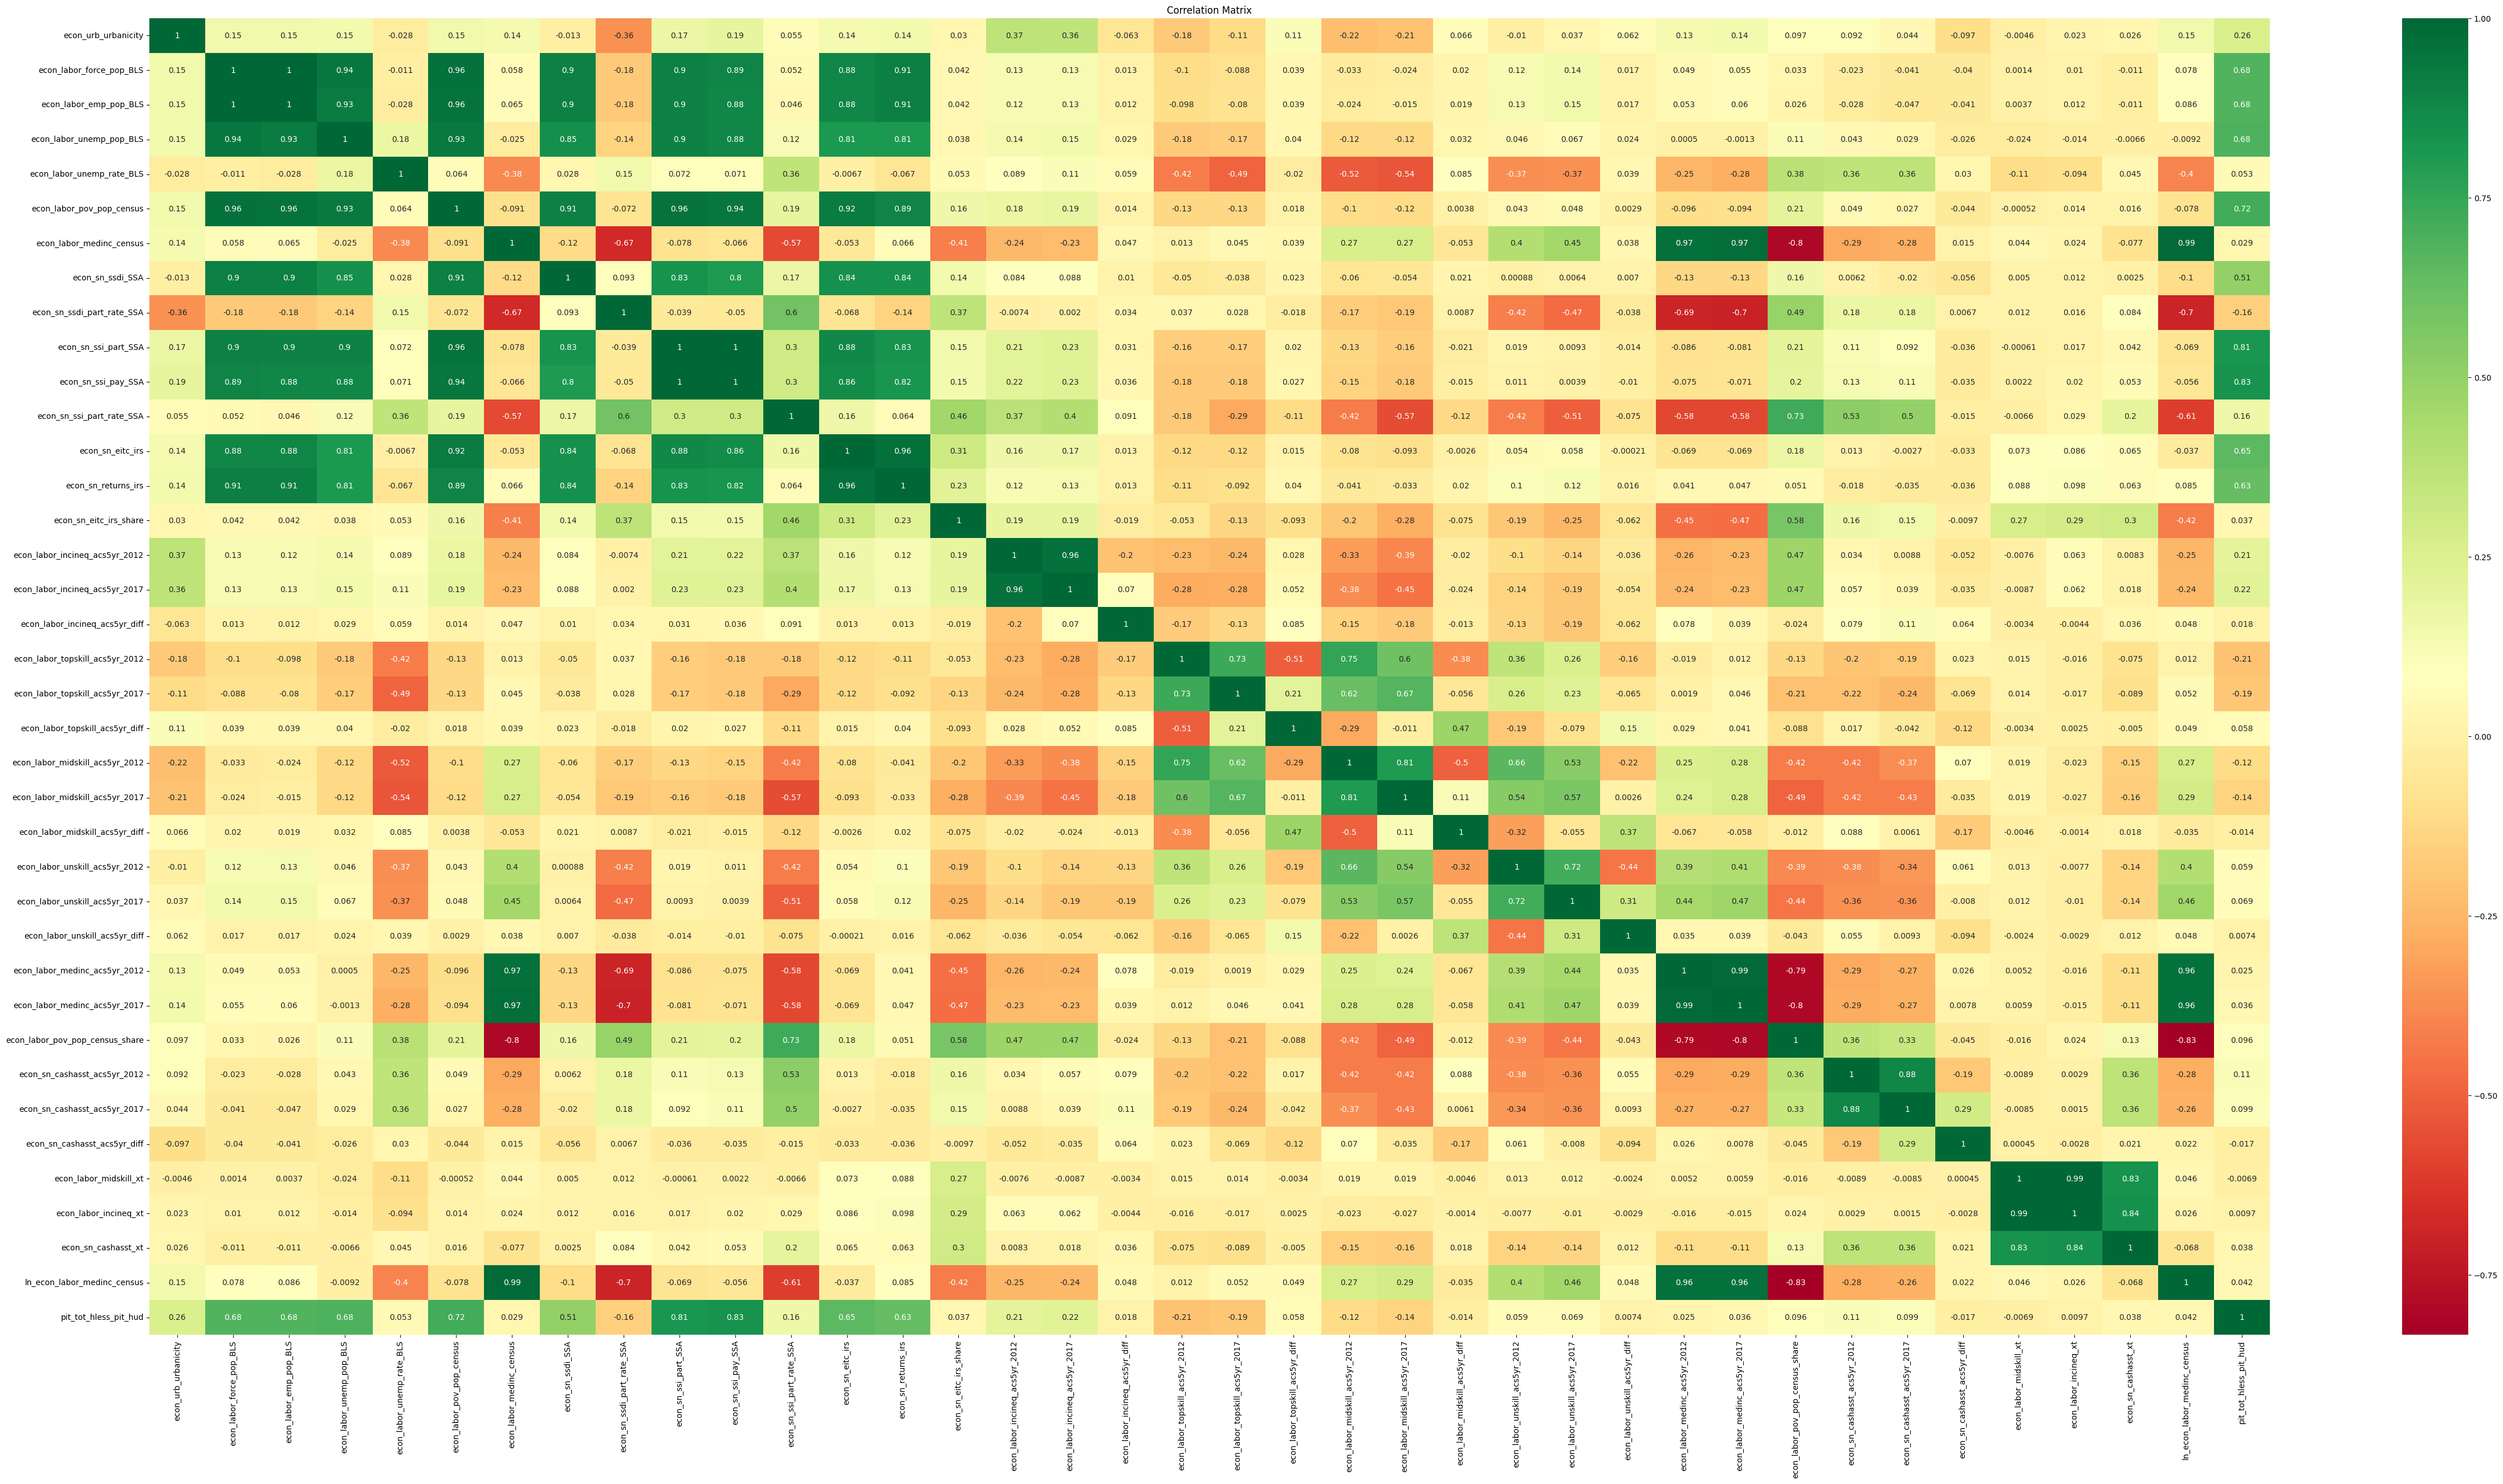

In [34]:
# Correlation Plot
column_correlations = df_econ.corr()
#column_correlations
plt.figure(figsize=(60,30))
plt.title('Correlation Matrix')
sns.heatmap(column_correlations, annot=True, cmap='RdYlGn') ;

In [35]:
# Fit linear regression model w/ just predictors high correlation with target
corrs = df_econ.corr()['pit_tot_hless_pit_hud'].abs().sort_values(ascending = False)
keep_df_econ = corrs[(corrs>.2) & (corrs <1)]
keep_df_econ

econ_sn_ssi_pay_SSA                0.834027
econ_sn_ssi_part_SSA               0.814295
econ_labor_pov_pop_census          0.718160
econ_labor_unemp_pop_BLS           0.684978
econ_labor_force_pop_BLS           0.683478
econ_labor_emp_pop_BLS             0.679242
econ_sn_eitc_irs                   0.653135
econ_sn_returns_irs                0.632021
econ_sn_ssdi_SSA                   0.505335
econ_urb_urbanicity                0.257662
econ_labor_incineq_acs5yr_2017     0.219361
econ_labor_incineq_acs5yr_2012     0.210439
econ_labor_topskill_acs5yr_2012    0.207498
Name: pit_tot_hless_pit_hud, dtype: float64

In [36]:
len(keep_df_econ)

13

# Histograms of Variable's distribution

We look to see if the variables have normal distribution.

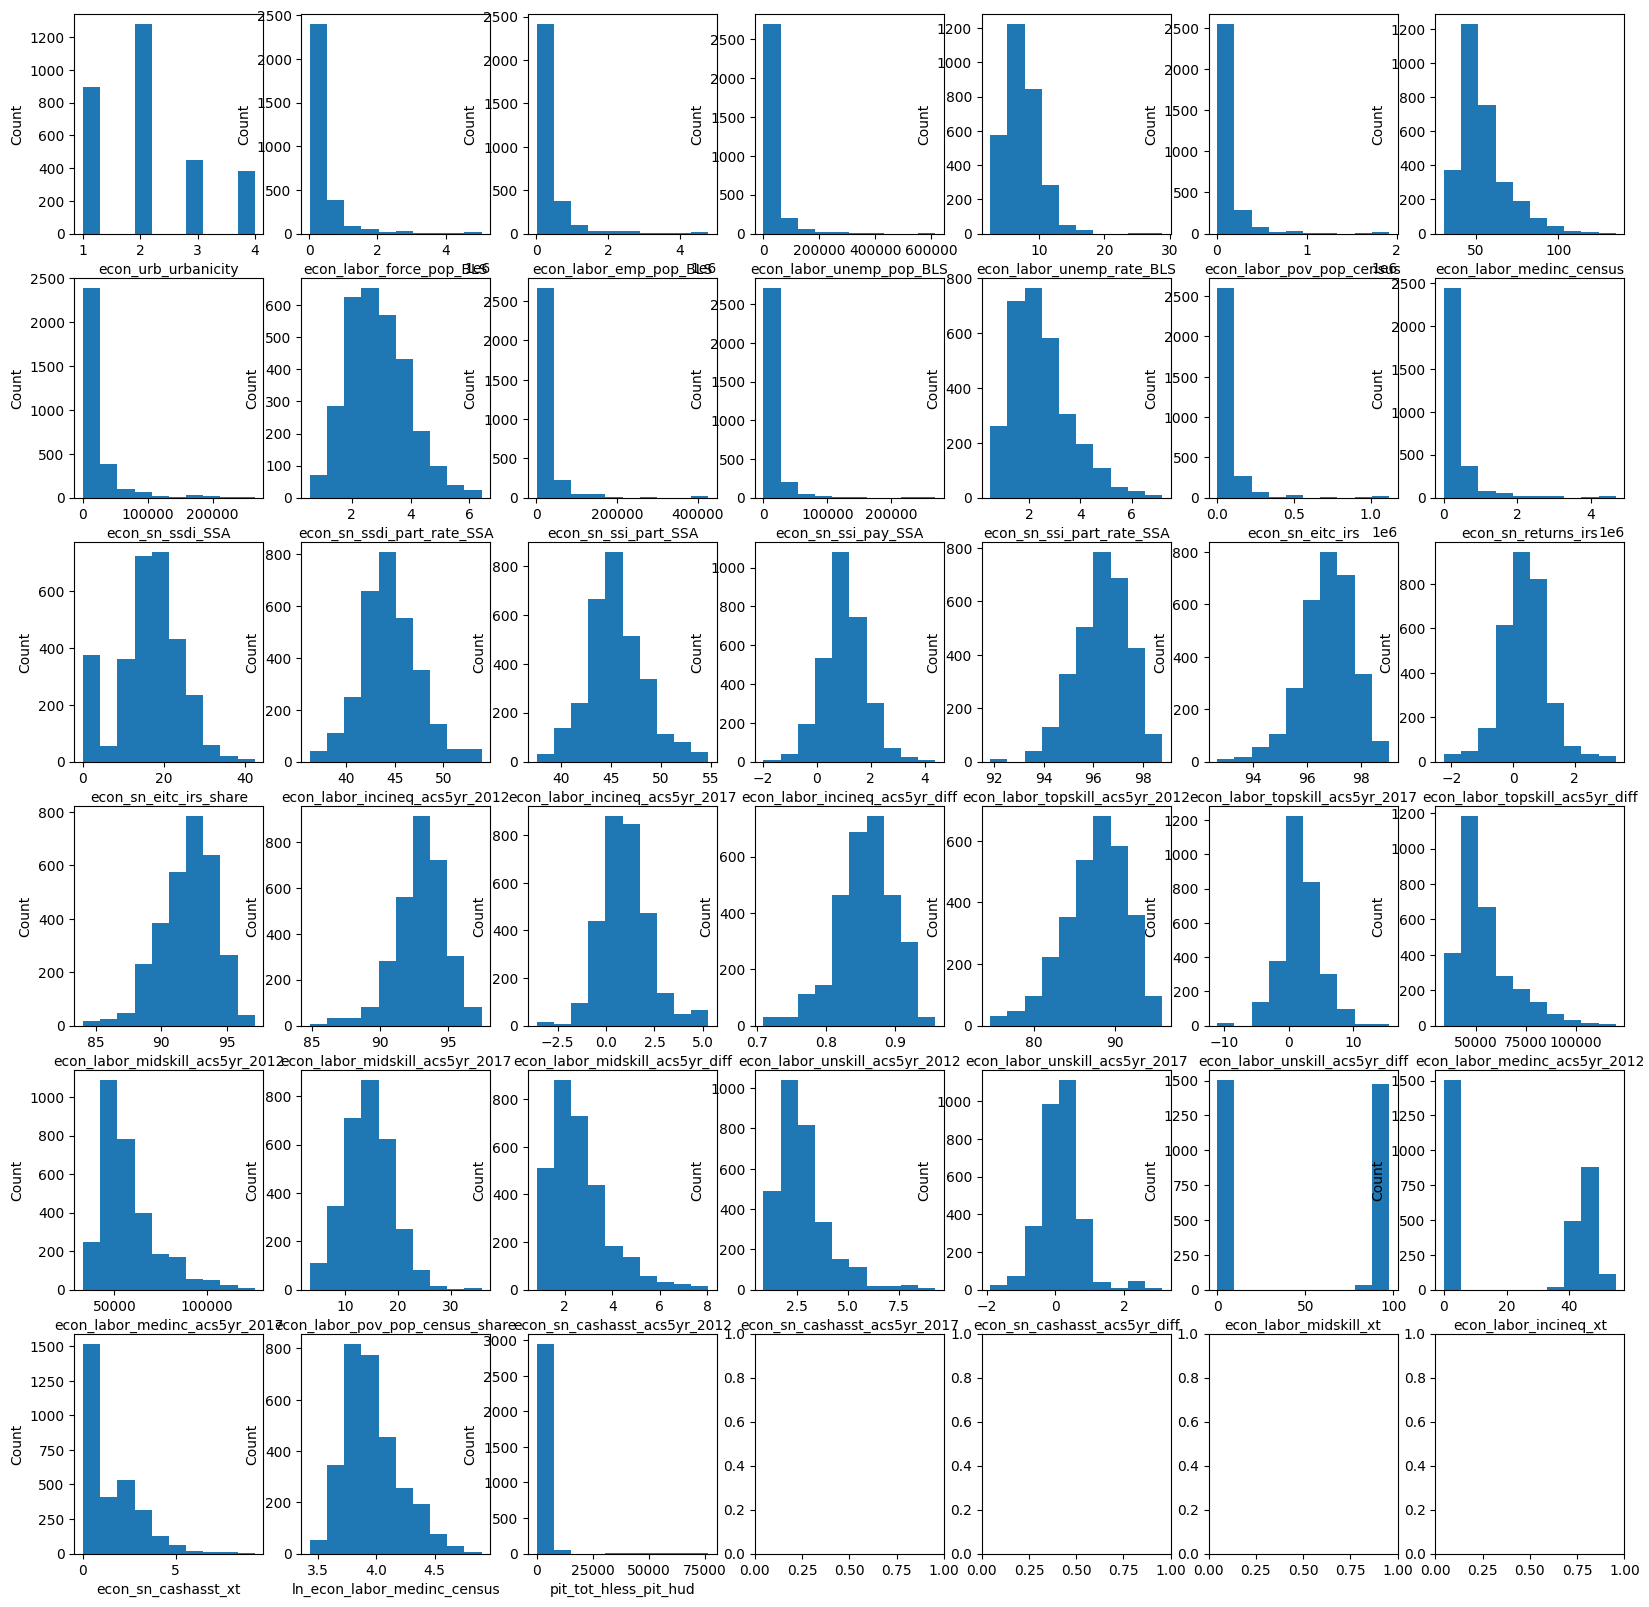

In [37]:
# Let's plot the target and all of our predictors
fig, subplots = plt.subplots(6,7, figsize = (20,20)) # Creating xxx subplots because we have 38 columns in our data
column_names = df_econ.columns

subplots = subplots.flatten()[:len(column_names)]  # flatten and slice axs
for n, subplot in enumerate(subplots):             # Loop through axes
  subplot.hist(df_econ[column_names[n]])
  subplot.set_xlabel(column_names[n])
  subplot.set_ylabel('Count')

In [38]:
df_econ.columns

Index(['econ_urb_urbanicity', 'econ_labor_force_pop_BLS',
       'econ_labor_emp_pop_BLS', 'econ_labor_unemp_pop_BLS',
       'econ_labor_unemp_rate_BLS', 'econ_labor_pov_pop_census',
       'econ_labor_medinc_census', 'econ_sn_ssdi_SSA',
       'econ_sn_ssdi_part_rate_SSA', 'econ_sn_ssi_part_SSA',
       'econ_sn_ssi_pay_SSA', 'econ_sn_ssi_part_rate_SSA', 'econ_sn_eitc_irs',
       'econ_sn_returns_irs', 'econ_sn_eitc_irs_share',
       'econ_labor_incineq_acs5yr_2012', 'econ_labor_incineq_acs5yr_2017',
       'econ_labor_incineq_acs5yr_diff', 'econ_labor_topskill_acs5yr_2012',
       'econ_labor_topskill_acs5yr_2017', 'econ_labor_topskill_acs5yr_diff',
       'econ_labor_midskill_acs5yr_2012', 'econ_labor_midskill_acs5yr_2017',
       'econ_labor_midskill_acs5yr_diff', 'econ_labor_unskill_acs5yr_2012',
       'econ_labor_unskill_acs5yr_2017', 'econ_labor_unskill_acs5yr_diff',
       'econ_labor_medinc_acs5yr_2012', 'econ_labor_medinc_acs5yr_2017',
       'econ_labor_pov_pop_census_sh

# Train/ test Split

In [39]:
# split into Target and Features
X = df_econ.drop(columns = ['pit_tot_hless_pit_hud'])
y = df_econ['pit_tot_hless_pit_hud']

In [40]:
#Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 1944.8
Number of Predictors: 37


CV RMSE: 1977.67
Number of Predictors: 37

In [41]:
#Keeps as a numpy matrix
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X) # makes X_scaled a Numpy matrix
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=1)

# Standard Scaling

In [42]:
#Scales and converts to a dataframe and then splits into test and training sets.
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=1)

We look to see if the standard deviation of the mean is close 1.  And that the mean of the mean is close to 0.  This checkpoint signifies that standard scaling has worked.

In [43]:
X_train[:].describe().transpose().describe().transpose()

count         mean       std          min          25%          50%  \
count   37.0  2406.000000  0.000000  2406.000000  2406.000000  2406.000000   
mean    37.0    -0.003767  0.007688    -0.017406    -0.009857    -0.004182   
std     37.0     0.995829  0.018327     0.952566     0.992713     1.000671   
min     37.0    -2.097515  1.323324    -4.447594    -3.429806    -1.775634   
25%     37.0    -0.634311  0.167316    -1.137444    -0.715472    -0.612930   
50%     37.0    -0.186249  0.269512    -0.999517    -0.284646    -0.156463   
75%     37.0     0.472981  0.296977    -0.022144     0.369978     0.542317   
max     37.0     5.003585  2.780030     1.106019     3.223722     4.473623   

               75%          max  
count  2406.000000  2406.000000  
mean      0.002385     0.009042  
std       1.007578     1.017420  
min      -0.836644    -0.504642  
25%      -0.493243    -0.394428  
50%      -0.021461     0.142657  
75%       0.657930     1.004514  
max       7.736673    11.947867

# Linear model using Sklearn

In [44]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )

(1574.2855434825904,
 array([ 1.70857361e+02,  6.64090024e+02,  7.79925546e+02, -6.77466432e+02,
         2.36515962e+02, -1.50051844e+03, -6.25406781e+02, -2.92817330e+03,
         8.78449977e+02,  6.88150542e+03, -1.28843802e+02, -1.50861869e+03,
        -3.12713607e+02,  6.53136155e+02, -2.22836152e+02,  2.07162330e+08,
        -2.03284175e+08,  5.65564932e+07,  2.84589438e+07, -2.51205391e+07,
         1.97653062e+07,  3.38395108e+06, -2.95136241e+06,  2.01990931e+06,
        -4.55777489e+07,  4.29752310e+07, -3.34112879e+07, -2.48619304e+03,
         2.80456710e+03,  7.42485734e+02,  1.37443945e+08, -1.41164467e+08,
         6.71812495e+07, -4.35122505e+02,  4.47706911e+02,  2.46724644e+01,
         6.56966162e+02]))

In [45]:
myfit2.coef_.shape

(37,)

## Model Results Dataframe creation

In [46]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = myfit2.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results


Predictor        Linear
15   econ_labor_incineq_acs5yr_2012  2.071623e+08
30     econ_sn_cashasst_acs5yr_2012  1.374439e+08
32     econ_sn_cashasst_acs5yr_diff  6.718125e+07
17   econ_labor_incineq_acs5yr_diff  5.655649e+07
25   econ_labor_unskill_acs5yr_2017  4.297523e+07
18  econ_labor_topskill_acs5yr_2012  2.845894e+07
20  econ_labor_topskill_acs5yr_diff  1.976531e+07
21  econ_labor_midskill_acs5yr_2012  3.383951e+06
23  econ_labor_midskill_acs5yr_diff  2.019909e+06
9              econ_sn_ssi_part_SSA  6.881505e+03
28    econ_labor_medinc_acs5yr_2017  2.804567e+03
8        econ_sn_ssdi_part_rate_SSA  8.784500e+02
2            econ_labor_emp_pop_BLS  7.799255e+02
29  econ_labor_pov_pop_census_share  7.424857e+02
1          econ_labor_force_pop_BLS  6.640900e+02
36      ln_econ_labor_medinc_census  6.569662e+02
13              econ_sn_returns_irs  6.531362e+02
34            econ_labor_incineq_xt  4.477069e+02
4         econ_labor_unemp_rate_BLS  2.365160e+02
0               econ_urb_urbanicity  1.708574e+02
35              econ_sn_cashasst_xt  2.467246e+01
10              econ_sn_ssi_pay_SSA -1.288438e+02
14           econ_sn_eitc_irs_share -2.228362e+02
12                 econ_sn_eitc_irs -3.127136e+02
33           econ_labor_midskill_xt -4.351225e+02
6          econ_labor_medinc_census -6.254068e+02
3          econ_labor_unemp_pop_BLS -6.774664e+02
5         econ_labor_pov_pop_census -1.500518e+03
11        econ_sn_ssi_part_rate_SSA -1.508619e+03
27    econ_labor_medinc_acs5yr_2012 -2.486193e+03
7                  econ_sn_ssdi_SSA -2.928173e+03
22  econ_labor_midskill_acs5yr_2017 -2.951362e+06
19  econ_labor_topskill_acs5yr_2017 -2.512054e+07
26   econ_labor_unskill_acs5yr_diff -3.341129e+07
24   econ_labor_unskill_acs5yr_2012 -4.557775e+07
31     econ_sn_cashasst_acs5yr_2017 -1.411645e+08
16   econ_labor_incineq_acs5yr_2017 -2.032842e+08

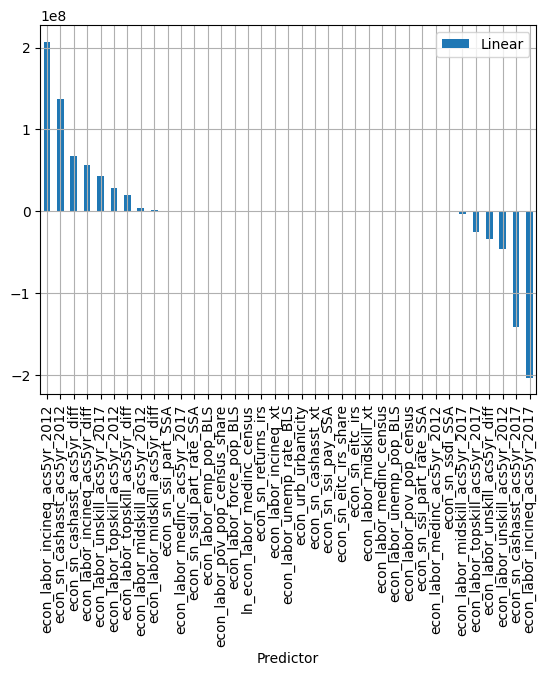

In [47]:
# We plot the coefficients
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()

In [48]:
# Calculate CV RMSE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring='neg_root_mean_squared_error',
    cv = 10
    )
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 2596.5702129810006


# CV RMSE: 2596.5702129810006

We are unable to do an RMSPE because we have some zeros which causes our calculation of an RMSPE to be infinity.

In [49]:
y_train.describe().transpose()

count     2406.000000
mean      1535.688695
std       4237.770667
min          0.000000
25%        312.250000
50%        665.000000
75%       1467.500000
max      76501.000000
Name: pit_tot_hless_pit_hud, dtype: float64

# Using Sklearn for linear regression

In [50]:
X.shape

(3008, 37)

In [51]:
X[:3]

econ_urb_urbanicity  econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  \
0                    3                    153834                  143806   
1                    3                    157923                  147539   
2                    3                    159006                  149542   

   econ_labor_unemp_pop_BLS  econ_labor_unemp_rate_BLS  \
0                     10028                   6.518715   
1                     10384                   6.575356   
2                      9464                   5.951977   

   econ_labor_pov_pop_census  econ_labor_medinc_census  econ_sn_ssdi_SSA  \
0                      21109                    72.210              4735   
1                      27351                    70.524              5040   
2                      24409                    71.237              5315   

   econ_sn_ssdi_part_rate_SSA  econ_sn_ssi_part_SSA  ...  \
0                    1.660273                  5354  ...   
1                    1.717967                  5535  ...   
2                    1.793845                  5774  ...   

   econ_labor_medinc_acs5yr_2012  econ_labor_medinc_acs5yr_2017  \
0                        75485.0                        80862.0   
1                        75485.0                        80862.0   
2                        75485.0                        80862.0   

   econ_labor_pov_pop_census_share  econ_sn_cashasst_acs5yr_2012  \
0                         7.401628                      6.401073   
1                         9.323039                      6.401073   
2                         8.238184                      6.401073   

   econ_sn_cashasst_acs5yr_2017  econ_sn_cashasst_acs5yr_diff  \
0                      5.534967                     -0.866106   
1                      5.534967                     -0.866106   
2                      5.534967                     -0.866106   

   econ_labor_midskill_xt  econ_labor_incineq_xt  econ_sn_cashasst_xt  \
0                0.000000                   0.00             0.000000   
1               92.623413                  41.32             6.401073   
2                0.000000                   0.00             0.000000   

   ln_econ_labor_medinc_census  
0                     4.279579  
1                     4.255953  
2                     4.266012  

[3 rows x 37 columns]

In [52]:
X_scaled.shape

(3008, 37)

In [53]:
X_scaled[:3]

econ_urb_urbanicity  econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  \
0             0.918705                 -0.438028               -0.436661   
1             0.918705                 -0.431136               -0.429845   
2             0.918705                 -0.429311               -0.426188   

   econ_labor_unemp_pop_BLS  econ_labor_unemp_rate_BLS  \
0                 -0.423893                  -0.355242   
1                 -0.416614                  -0.334278   
2                 -0.435425                  -0.565007   

   econ_labor_pov_pop_census  econ_labor_medinc_census  econ_sn_ssdi_SSA  \
0                  -0.501565                  1.245424         -0.567759   
1                  -0.471188                  1.127917         -0.557963   
2                  -0.485505                  1.177610         -0.549130   

   econ_sn_ssdi_part_rate_SSA  econ_sn_ssi_part_SSA  ...  \
0                   -1.223544             -0.401566  ...   
1                   -1.166594             -0.397111  ...   
2                   -1.091695             -0.391228  ...   

   econ_labor_medinc_acs5yr_2012  econ_labor_medinc_acs5yr_2017  \
0                       1.492336                       1.570586   
1                       1.492336                       1.570586   
2                       1.492336                       1.570586   

   econ_labor_pov_pop_census_share  econ_sn_cashasst_acs5yr_2012  \
0                        -1.572521                      3.121617   
1                        -1.142027                      3.121617   
2                        -1.385089                      3.121617   

   econ_sn_cashasst_acs5yr_2017  econ_sn_cashasst_acs5yr_diff  \
0                       2.22872                     -1.703316   
1                       2.22872                     -1.703316   
2                       2.22872                     -1.703316   

   econ_labor_midskill_xt  econ_labor_incineq_xt  econ_sn_cashasst_xt  \
0               -0.999517              -0.995806            -0.836644   
1                1.001112               0.832458             3.171567   
2               -0.999517              -0.995806            -0.836644   

   ln_econ_labor_medinc_census  
0                     1.320141  
1                     1.220952  
2                     1.263184  

[3 rows x 37 columns]

In [54]:
X_train.shape

(2406, 37)

In [55]:
X_train[:3]

econ_urb_urbanicity  econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  \
2633              1.94678                  0.672127                0.676179   
1185              1.94678                 -0.199254               -0.220228   
268               1.94678                  0.145695                0.093684   

      econ_labor_unemp_pop_BLS  econ_labor_unemp_rate_BLS  \
2633                  0.581575                  -0.071109   
1185                  0.049019                   1.385014   
268                   0.718363                   2.108095   

      econ_labor_pov_pop_census  econ_labor_medinc_census  econ_sn_ssdi_SSA  \
2633                   0.786662                 -0.461156          0.716845   
1185                   0.113802                 -1.125918          0.017130   
268                    0.869054                 -0.762855         -0.019968   

      econ_sn_ssdi_part_rate_SSA  econ_sn_ssi_part_SSA  ...  \
2633                   -0.299530              0.760053  ...   
1185                    0.784639              0.336572  ...   
268                    -0.916958              0.645912  ...   

      econ_labor_medinc_acs5yr_2012  econ_labor_medinc_acs5yr_2017  \
2633                      -0.460602                      -0.327562   
1185                      -1.029549                      -0.866266   
268                       -0.536564                      -0.755022   

      econ_labor_pov_pop_census_share  econ_sn_cashasst_acs5yr_2012  \
2633                         0.486208                     -0.499221   
1185                         2.092597                      2.466911   
268                          2.904303                      3.524498   

      econ_sn_cashasst_acs5yr_2017  econ_sn_cashasst_acs5yr_diff  \
2633                     -0.807174                     -0.674735   
1185                      2.315873                     -0.180742   
268                       4.223585                      1.664156   

      econ_labor_midskill_xt  econ_labor_incineq_xt  econ_sn_cashasst_xt  \
2633                1.028369               1.064309             0.409424   
1185                0.914219               1.217402             2.672126   
268                -0.999517              -0.995806            -0.836644   

      ln_econ_labor_medinc_census  
2633                    -0.418604  
1185                    -1.354703  
268                     -0.817808  

[3 rows x 37 columns]

In [56]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )


(1574.2855434825904,
 array([ 1.70857361e+02,  6.64090024e+02,  7.79925546e+02, -6.77466432e+02,
         2.36515962e+02, -1.50051844e+03, -6.25406781e+02, -2.92817330e+03,
         8.78449977e+02,  6.88150542e+03, -1.28843802e+02, -1.50861869e+03,
        -3.12713607e+02,  6.53136155e+02, -2.22836152e+02,  2.07162330e+08,
        -2.03284175e+08,  5.65564932e+07,  2.84589438e+07, -2.51205391e+07,
         1.97653062e+07,  3.38395108e+06, -2.95136241e+06,  2.01990931e+06,
        -4.55777489e+07,  4.29752310e+07, -3.34112879e+07, -2.48619304e+03,
         2.80456710e+03,  7.42485734e+02,  1.37443945e+08, -1.41164467e+08,
         6.71812495e+07, -4.35122505e+02,  4.47706911e+02,  2.46724644e+01,
         6.56966162e+02]))

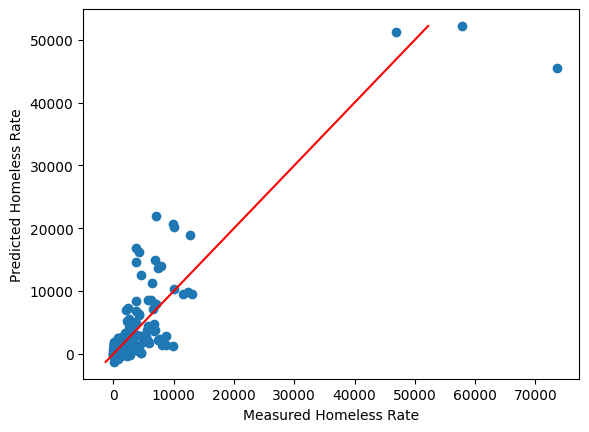

In [57]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Measured Homeless Rate')
plt.ylabel('Predicted Homeless Rate') ;

In [58]:
list(zip(y_test,y_pred))[:10]

[(276.0, 868.3360770188995),
 (1832.0, 2916.800062337481),
 (151.0, -1271.699416919888),
 (239.0, 179.080421448454),
 (735.0, 1516.4613906349186),
 (27.0, 723.1974076191134),
 (221.0, 851.0343223260934),
 (531.0, 1055.2025437093762),
 (471.0, 606.197838975276),
 (1424.0, 2284.22977180627)]

In [59]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 2175.8404382998315


# RMSE: 2098.1800957525697


In [60]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 2596.725817649346


# CV RMSE: 2596.725817649346

In [61]:
pd.DataFrame(X_scaled).describe().transpose()

count          mean       std       min  \
econ_urb_urbanicity              3008.0  2.173203e-16  1.000166 -1.137444   
econ_labor_force_pop_BLS         3008.0 -4.251918e-17  1.000166 -0.671077   
econ_labor_emp_pop_BLS           3008.0 -1.653524e-17  1.000166 -0.672923   
econ_labor_unemp_pop_BLS         3008.0  0.000000e+00  1.000166 -0.610878   
econ_labor_unemp_rate_BLS        3008.0  1.889741e-17  1.000166 -1.838605   
econ_labor_pov_pop_census        3008.0 -1.653524e-17  1.000166 -0.587120   
econ_labor_medinc_census         3008.0 -5.787333e-17  1.000166 -1.635119   
econ_sn_ssdi_SSA                 3008.0  0.000000e+00  1.000166 -0.700732   
econ_sn_ssdi_part_rate_SSA       3008.0 -1.275575e-16  1.000166 -2.284336   
econ_sn_ssi_part_SSA             3008.0  1.771632e-17  1.000166 -0.519646   
econ_sn_ssi_pay_SSA              3008.0  0.000000e+00  1.000166 -0.504642   
econ_sn_ssi_part_rate_SSA        3008.0 -4.724353e-17  1.000166 -1.775634   
econ_sn_eitc_irs                 3008.0  2.598394e-17  1.000166 -0.551910   
econ_sn_returns_irs              3008.0  4.724353e-18  1.000166 -0.635393   
econ_sn_eitc_irs_share           3008.0 -1.700767e-16  1.000166 -1.996647   
econ_labor_incineq_acs5yr_2012   3008.0  1.861395e-15  1.000166 -2.825470   
econ_labor_incineq_acs5yr_2017   3008.0  1.322819e-15  1.000166 -2.791604   
econ_labor_incineq_acs5yr_diff   3008.0  1.464550e-16  1.000166 -3.767899   
econ_labor_topskill_acs5yr_2012  3008.0  2.494459e-15  1.000166 -4.220392   
econ_labor_topskill_acs5yr_2017  3008.0  5.385763e-15  1.000166 -4.313250   
econ_labor_topskill_acs5yr_diff  3008.0 -1.889741e-17  1.000166 -3.514149   
econ_labor_midskill_acs5yr_2012  3008.0 -3.779483e-17  1.000166 -3.826385   
econ_labor_midskill_acs5yr_2017  3008.0  3.212560e-16  1.000166 -4.447594   
econ_labor_midskill_acs5yr_diff  3008.0  9.448707e-18  1.000166 -3.630368   
econ_labor_unskill_acs5yr_2012   3008.0  1.247229e-15  1.000166 -3.555727   
econ_labor_unskill_acs5yr_2017   3008.0  1.058255e-15  1.000166 -3.312512   
econ_labor_unskill_acs5yr_diff   3008.0 -6.141659e-17  1.000166 -4.243285   
econ_labor_medinc_acs5yr_2012    3008.0 -1.960607e-16  1.000166 -1.453534   
econ_labor_medinc_acs5yr_2017    3008.0  2.480285e-17  1.000166 -1.608374   
econ_labor_pov_pop_census_share  3008.0  3.307047e-16  1.000166 -2.480211   
econ_sn_cashasst_acs5yr_2012     3008.0 -3.779483e-17  1.000166 -1.463024   
econ_sn_cashasst_acs5yr_2017     3008.0 -2.220446e-16  1.000166 -1.524129   
econ_sn_cashasst_acs5yr_diff     3008.0 -2.834612e-17  1.000166 -3.429806   
econ_labor_midskill_xt           3008.0 -1.062979e-16  1.000166 -0.999517   
econ_labor_incineq_xt            3008.0 -1.263765e-16  1.000166 -0.995806   
econ_sn_cashasst_xt              3008.0  1.181088e-17  1.000166 -0.836644   
ln_econ_labor_medinc_census      3008.0 -2.125959e-17  1.000166 -2.246277   

                                      25%       50%       75%        max  
econ_urb_urbanicity             -1.137444 -0.109370  0.918705   1.946780  
econ_labor_force_pop_BLS        -0.475994 -0.298226  0.064775   7.822378  
econ_labor_emp_pop_BLS          -0.477589 -0.299910  0.073081   8.045470  
econ_labor_unemp_pop_BLS        -0.447054 -0.289619  0.016693  11.947867  
econ_labor_unemp_rate_BLS       -0.729525 -0.110188  0.542076   7.914343  
econ_labor_pov_pop_census       -0.435081 -0.288065 -0.021300   8.706112  
econ_labor_medinc_census        -0.695503 -0.246074  0.406265   5.594396  
econ_sn_ssdi_SSA                -0.492641 -0.298601  0.032507   7.784816  
econ_sn_ssdi_part_rate_SSA      -0.748996 -0.089710  0.644178   3.468314  
econ_sn_ssi_part_SSA            -0.402902 -0.283068 -0.019020   9.952526  
econ_sn_ssi_pay_SSA             -0.393158 -0.281501 -0.026968  11.060366  
econ_sn_ssi_part_rate_SSA       -0.712224 -0.151432  0.545388   4.230709  
econ_sn_eitc_irs                -0.437299 -0.276408  0.009631   8.984227  
econ_sn_returns_irs             -0.479002 -0.280680  0.08

In [62]:
list(zip(y_test,y_pred))[:10]

[(276.0, 868.3360770188995),
 (1832.0, 2916.800062337481),
 (151.0, -1271.699416919888),
 (239.0, 179.080421448454),
 (735.0, 1516.4613906349186),
 (27.0, 723.1974076191134),
 (221.0, 851.0343223260934),
 (531.0, 1055.2025437093762),
 (471.0, 606.197838975276),
 (1424.0, 2284.22977180627)]

In [63]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 2175.8404382998315


# RMSE: 2098.1800957525697

In [64]:
# Use cross validation to assess model performance - scaled
results = cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 2596.5702129810006


# CV RMSE: 2596.5702129810006

## Residual analysis

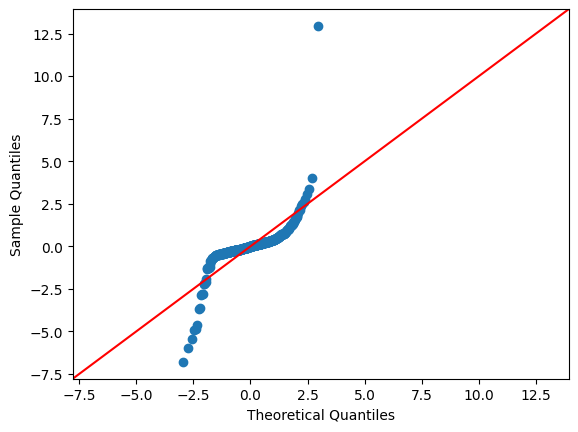

In [65]:
# QQ Plot - to check to see if Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

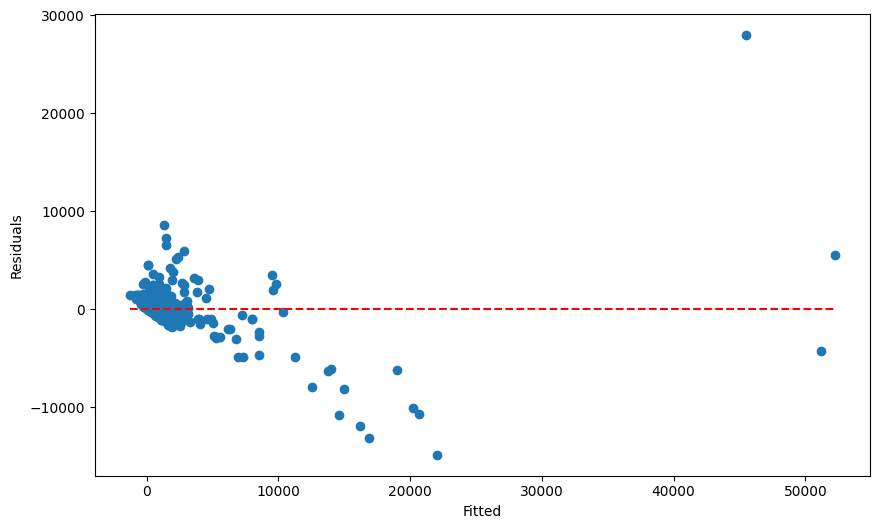

In [66]:
# Residuals vs Fitted (Predicted) Values - is there Constant variance?
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

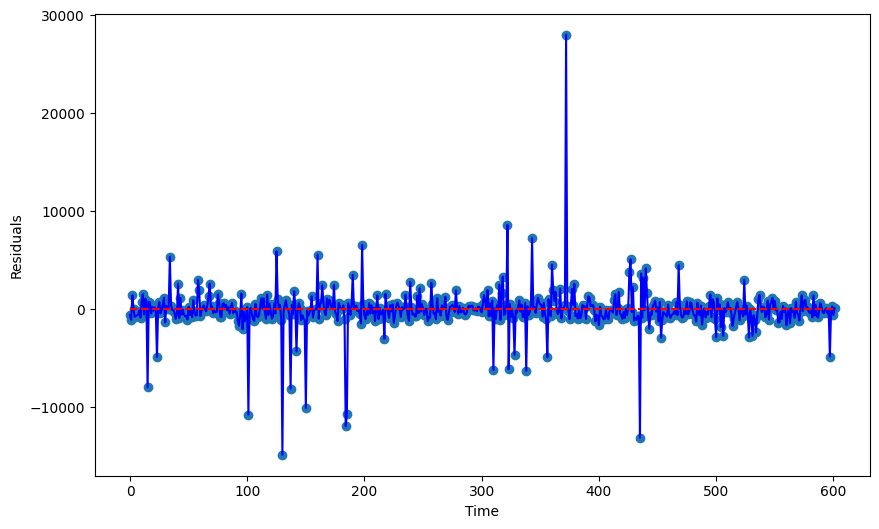

In [67]:
# Residuals vs Time - independence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

# Regularization

## Ridge Regression

In [68]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [69]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 2165.1729532082377


## RMSE: 2077.948847319268

In [70]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.01069e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.26908e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.36227e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.69388e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarnin

           Alpha         RMSE
15  5.000000e+01  2150.701453
14  3.000000e+01  2203.017115
13  2.000000e+01  2243.984968
12  1.000000e+01  2312.360568
11  5.000000e+00  2379.301340
10  4.000000e+00  2400.083825
9   3.000000e+00  2425.719172
8   2.000000e+00  2458.624293
7   1.000000e+00  2503.222189
6   1.000000e-01  2560.677959
5   1.000000e-02  2567.794417
4   1.000000e-03  2568.523394
3   1.000000e-04  2568.596688
2   1.000000e-08  2571.390118
1   1.000000e-10  2587.952335
0   1.000000e-15  2595.983409


In [71]:
# Retrain the model w/ alpha = 50
my_fit_rr = Ridge(alpha = 50)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 2150.7014532628828


## CV RMSE: 2150.7014532628828

In [72]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [73]:
model_results

Predictor        Linear        Ridge
15   econ_labor_incineq_acs5yr_2012  2.071623e+08   174.655487
30     econ_sn_cashasst_acs5yr_2012  1.374439e+08   270.912377
32     econ_sn_cashasst_acs5yr_diff  6.718125e+07   328.400740
17   econ_labor_incineq_acs5yr_diff  5.655649e+07  -391.093477
25   econ_labor_unskill_acs5yr_2017  4.297523e+07   139.833290
18  econ_labor_topskill_acs5yr_2012  2.845894e+07     3.824948
20  econ_labor_topskill_acs5yr_diff  1.976531e+07   -95.538338
21  econ_labor_midskill_acs5yr_2012  3.383951e+06 -2280.998322
23  econ_labor_midskill_acs5yr_diff  2.019909e+06   510.572760
9              econ_sn_ssi_part_SSA  6.881505e+03  2581.327072
28    econ_labor_medinc_acs5yr_2017  2.804567e+03  2594.618399
8        econ_sn_ssdi_part_rate_SSA  8.784500e+02  -866.738921
2            econ_labor_emp_pop_BLS  7.799255e+02  -119.400157
29  econ_labor_pov_pop_census_share  7.424857e+02   385.472150
1          econ_labor_force_pop_BLS  6.640900e+02  -225.424308
36      ln_econ_labor_medinc_census  6.569662e+02    59.566021
13              econ_sn_returns_irs  6.531362e+02    57.033708
34            econ_labor_incineq_xt  4.477069e+02   -13.177520
4         econ_labor_unemp_rate_BLS  2.365160e+02  -112.517522
0               econ_urb_urbanicity  1.708574e+02   -68.536880
35              econ_sn_cashasst_xt  2.467246e+01    74.917869
10              econ_sn_ssi_pay_SSA -1.288438e+02    37.685067
14           econ_sn_eitc_irs_share -2.228362e+02   -48.076839
12                 econ_sn_eitc_irs -3.127136e+02  -133.371457
33           econ_labor_midskill_xt -4.351225e+02    47.874993
6          econ_labor_medinc_census -6.254068e+02    84.591342
3          econ_labor_unemp_pop_BLS -6.774664e+02    43.496523
5         econ_labor_pov_pop_census -1.500518e+03  -575.518955
11        econ_sn_ssi_part_rate_SSA -1.508619e+03   699.693457
27    econ_labor_medinc_acs5yr_2012 -2.486193e+03   174.812214
7                  econ_sn_ssdi_SSA -2.928173e+03    83.905432
22  econ_labor_midskill_acs5yr_2017 -2.951362e+06    87.674822
19  econ_labor_topskill_acs5yr_2017 -2.512054e+07    12.568027
26   econ_labor_unskill_acs5yr_diff -3.341129e+07   -49.751239
24   econ_labor_unskill_acs5yr_2012 -4.557775e+07    56.936298
31     econ_sn_cashasst_acs5yr_2017 -1.411645e+08    33.386206
16   econ_labor_incineq_acs5yr_2017 -2.032842e+08    65.196055

## Lasso Regression

In [74]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.920e+09, tolerance: 4.319e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.989e+09, tolerance: 5.474e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+09, tolerance: 4.024e

           Alpha         RMSE
15  5.000000e+01  2160.355053
14  3.000000e+01  2229.049370
13  2.000000e+01  2268.644702
12  1.000000e+01  2307.972571
11  5.000000e+00  2378.975835
10  4.000000e+00  2403.970685
9   3.000000e+00  2438.690957
8   2.000000e+00  2478.995019
7   1.000000e+00  2522.814042
6   1.000000e-01  2564.066437
5   1.000000e-02  2568.166011
4   1.000000e-03  2568.560757
3   1.000000e-04  2568.600067
2   1.000000e-08  2568.604578
1   1.000000e-10  2568.604579
0   1.000000e-15  2568.604579


In [75]:
# Train the model
my_fit_lasso = Lasso(alpha = 50, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 2160.355053196491


## CV RMSE: 2160.355053196491

In [76]:
type(my_fit_lasso.coef_)

numpy.ndarray

In [77]:
my_fit_lasso.coef_.shape

(37,)

In [78]:
my_fit_lasso.coef_

array([ 1.04603880e+02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.17332889e+03,
        9.04296367e+01,  4.64772345e+03,  7.16648850e+02, -5.12302165e+02,
        0.00000000e+00,  1.25521603e+02, -1.00226041e+02,  2.52611595e+01,
        0.00000000e+00, -0.00000000e+00, -1.17600132e+02, -0.00000000e+00,
        2.29772298e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.98900858e+01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.80087446e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

In [79]:
X_train.shape

(2406, 37)

In [80]:
X_train[:1]

econ_urb_urbanicity  econ_labor_force_pop_BLS  econ_labor_emp_pop_BLS  \
2633              1.94678                  0.672127                0.676179   

      econ_labor_unemp_pop_BLS  econ_labor_unemp_rate_BLS  \
2633                  0.581575                  -0.071109   

      econ_labor_pov_pop_census  econ_labor_medinc_census  econ_sn_ssdi_SSA  \
2633                   0.786662                 -0.461156          0.716845   

      econ_sn_ssdi_part_rate_SSA  econ_sn_ssi_part_SSA  ...  \
2633                    -0.29953              0.760053  ...   

      econ_labor_medinc_acs5yr_2012  econ_labor_medinc_acs5yr_2017  \
2633                      -0.460602                      -0.327562   

      econ_labor_pov_pop_census_share  econ_sn_cashasst_acs5yr_2012  \
2633                         0.486208                     -0.499221   

      econ_sn_cashasst_acs5yr_2017  econ_sn_cashasst_acs5yr_diff  \
2633                     -0.807174                     -0.674735   

      econ_labor_midskill_xt  econ_labor_incineq_xt  econ_sn_cashasst_xt  \
2633                1.028369               1.064309             0.409424   

      ln_econ_labor_medinc_census  
2633                    -0.418604  

[1 rows x 37 columns]

#Results from linear, ridge, and lasso regression

In [81]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_
model_results

Predictor        Linear        Ridge        Lasso
15   econ_labor_incineq_acs5yr_2012  2.071623e+08   174.655487   104.603880
30     econ_sn_cashasst_acs5yr_2012  1.374439e+08   270.912377     0.000000
32     econ_sn_cashasst_acs5yr_diff  6.718125e+07   328.400740     0.000000
17   econ_labor_incineq_acs5yr_diff  5.655649e+07  -391.093477    -0.000000
25   econ_labor_unskill_acs5yr_2017  4.297523e+07   139.833290     0.000000
18  econ_labor_topskill_acs5yr_2012  2.845894e+07     3.824948    -0.000000
20  econ_labor_topskill_acs5yr_diff  1.976531e+07   -95.538338    -0.000000
21  econ_labor_midskill_acs5yr_2012  3.383951e+06 -2280.998322 -2173.328889
23  econ_labor_midskill_acs5yr_diff  2.019909e+06   510.572760    90.429637
9              econ_sn_ssi_part_SSA  6.881505e+03  2581.327072  4647.723454
28    econ_labor_medinc_acs5yr_2017  2.804567e+03  2594.618399   716.648850
8        econ_sn_ssdi_part_rate_SSA  8.784500e+02  -866.738921  -512.302165
2            econ_labor_emp_pop_BLS  7.799255e+02  -119.400157     0.000000
29  econ_labor_pov_pop_census_share  7.424857e+02   385.472150   125.521603
1          econ_labor_force_pop_BLS  6.640900e+02  -225.424308  -100.226041
36      ln_econ_labor_medinc_census  6.569662e+02    59.566021    25.261160
13              econ_sn_returns_irs  6.531362e+02    57.033708     0.000000
34            econ_labor_incineq_xt  4.477069e+02   -13.177520    -0.000000
4         econ_labor_unemp_rate_BLS  2.365160e+02  -112.517522  -117.600132
0               econ_urb_urbanicity  1.708574e+02   -68.536880    -0.000000
35              econ_sn_cashasst_xt  2.467246e+01    74.917869     2.297723
10              econ_sn_ssi_pay_SSA -1.288438e+02    37.685067    -0.000000
14           econ_sn_eitc_irs_share -2.228362e+02   -48.076839    -0.000000
12                 econ_sn_eitc_irs -3.127136e+02  -133.371457    -0.000000
33           econ_labor_midskill_xt -4.351225e+02    47.874993     0.000000
6          econ_labor_medinc_census -6.254068e+02    84.591342    19.890086
3          econ_labor_unemp_pop_BLS -6.774664e+02    43.496523     0.000000
5         econ_labor_pov_pop_census -1.500518e+03  -575.518955    -0.000000
11        econ_sn_ssi_part_rate_SSA -1.508619e+03   699.693457     0.000000
27    econ_labor_medinc_acs5yr_2012 -2.486193e+03   174.812214    -0.000000
7                  econ_sn_ssdi_SSA -2.928173e+03    83.905432     0.000000
22  econ_labor_midskill_acs5yr_2017 -2.951362e+06    87.674822    48.008745
19  econ_labor_topskill_acs5yr_2017 -2.512054e+07    12.568027     0.000000
26   econ_labor_unskill_acs5yr_diff -3.341129e+07   -49.751239     0.000000
24   econ_labor_unskill_acs5yr_2012 -4.557775e+07    56.936298     0.000000
31     econ_sn_cashasst_acs5yr_2017 -1.411645e+08    33.386206     0.000000
16   econ_labor_incineq_acs5yr_2017 -2.032842e+08    65.196055    -0.000000

Where Lasso is 0, features are not significant.

In [82]:
model_results.plot?

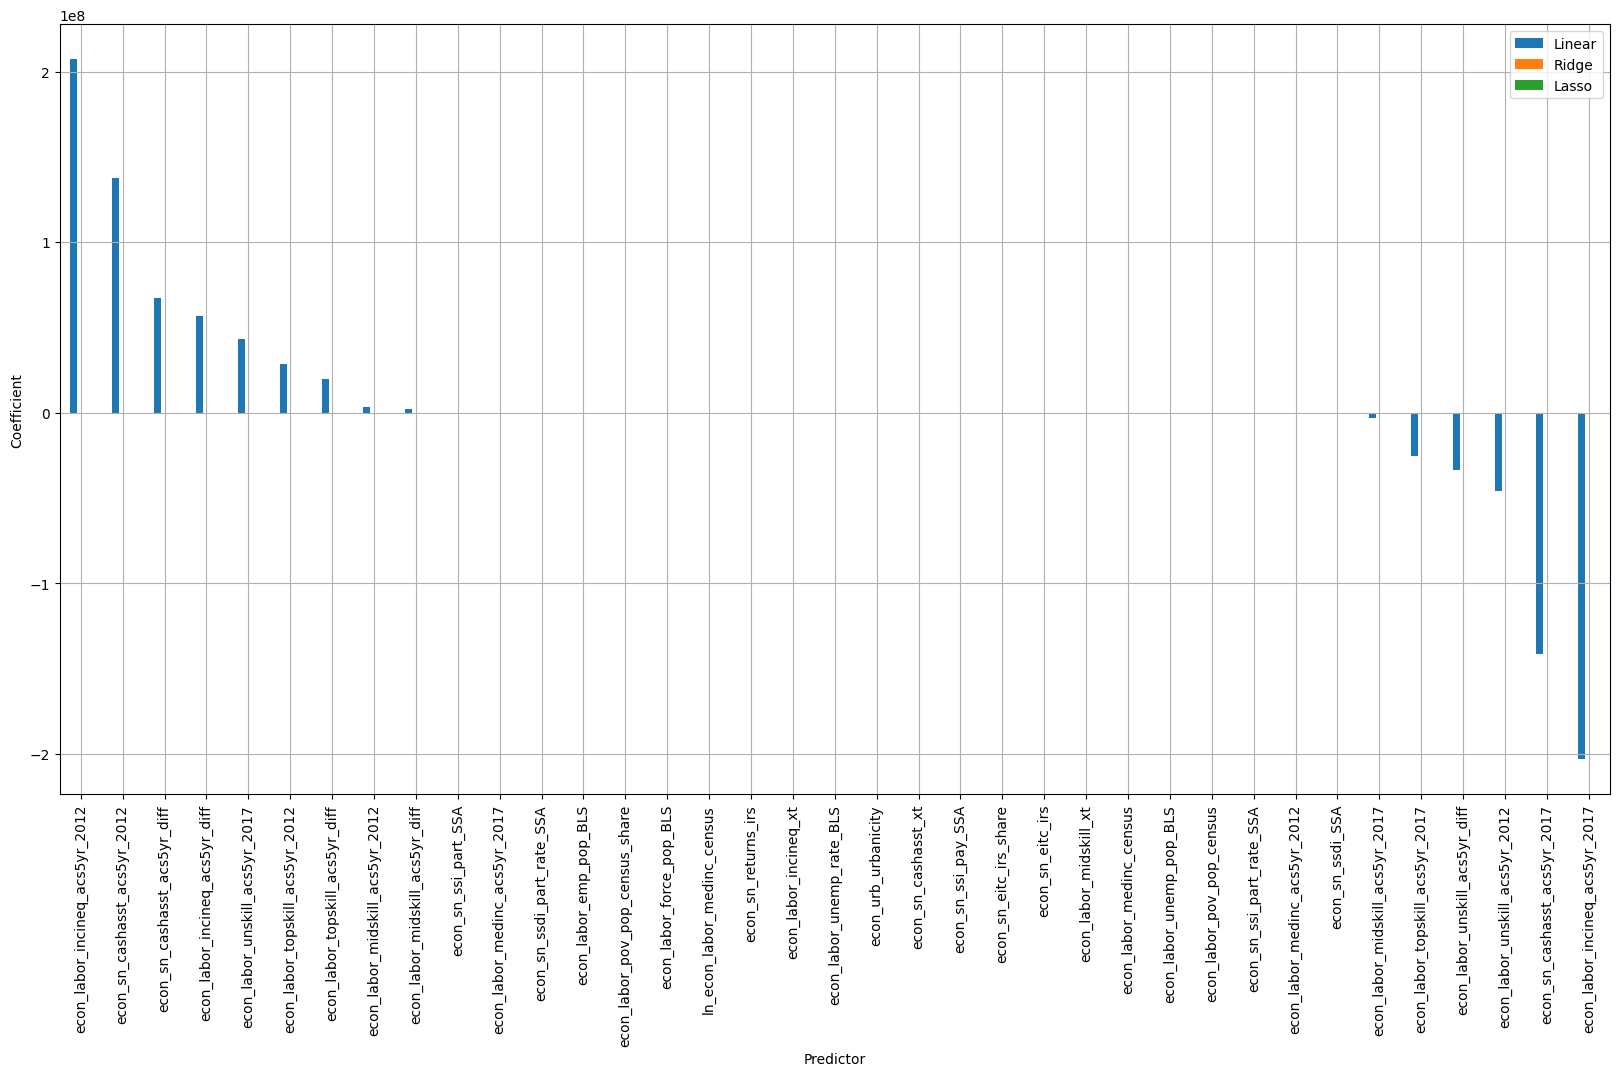

In [83]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (20,10))
#ax.set_yscale('log')
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

# Decision Tree Regressor

In [84]:
numLoops = 20

mean_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=5, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

print(f'CV RMSE: {np.sqrt(mean_error).mean()}')
print(f'CV RMSE_std: {np.sqrt(mean_error).std()}')


CV RMSE: 1060.301514671518
CV RMSE_std: 218.36783530576787


## CV RMSE: 1060.301514671518; CV RMSE_std: 218.36783530576787


# Random Forest

Random Forest Model

In [85]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 50

mean_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'CV RMSE: {np.sqrt(mean_error).mean()}')
print(f'CV RMSE_std: {np.sqrt(mean_error).std()}')
np.sqrt(mean_error)[:50]


CV RMSE: 727.3239187215509
CV RMSE_std: 231.77549419430696


array([ 666.28367281,  592.93260305,  473.15508757,  450.18560556,
        783.1205099 , 1374.54751883,  743.05591361,  639.20688461,
        611.50362038,  595.95856465,  871.14365026,  764.10907394,
        577.88685625,  529.85935398,  801.89004862,  835.2537478 ,
        695.40265558,  664.91406429,  464.95603602,  836.44035164,
        652.83608801,  553.78797645,  695.44168246, 1693.89176432,
        589.05339077,  625.28712981,  568.13146182,  695.03222671,
        640.96012004,  577.04788895, 1123.80662924,  945.13590355,
        683.47883484,  529.48121262,  532.51244306,  688.7691118 ,
        839.11233897,  549.81254478,  824.19461507,  571.87496569,
        616.98096863,  571.70445253,  931.37426057,  527.39250228,
       1048.24083825,  971.75190086,  771.32448732,  952.88068322,
        464.31613795,  958.77555619])

## CV RMSE: 727.3239187215509 CV RMSE_std: 231.77549419430696

Choosing best number of trees

In [86]:
num_trees = range(10,60,10)
cv_loops = 50
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


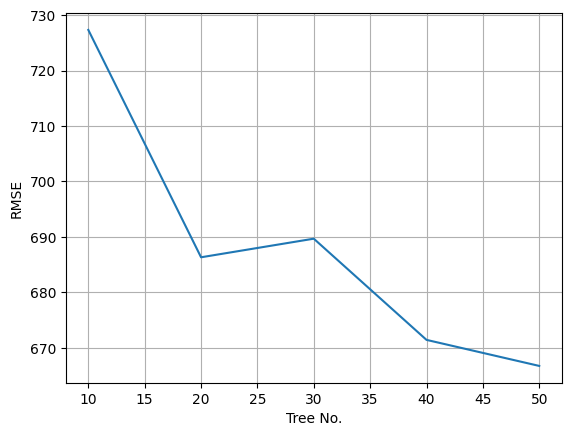

In [87]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [88]:
pd.DataFrame( zip( rmse_results, std_results, ) )

0           1
0  727.323919  231.775494
1  686.311317  163.751862
2  689.665375  161.163854
3  671.411084  143.192642
4  666.713279  179.438186

## CV RSME: 666.713279 CV RMSE_std: 179.438186

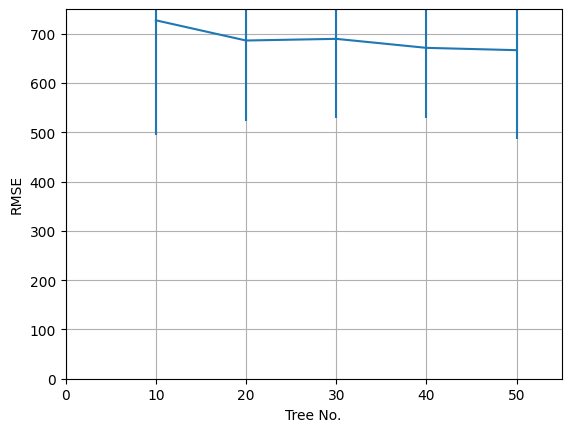

In [89]:
# plt.errorbar(num_trees, rmse_results, yerr=(std_results*2,std_results*2))
plt.errorbar(num_trees, rmse_results, yerr=std_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.ylim(0,750)
plt.xlim(0,55)
plt.grid()

In [90]:
len(rfModel.estimators_)

50

In [91]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

## Finding important predictors

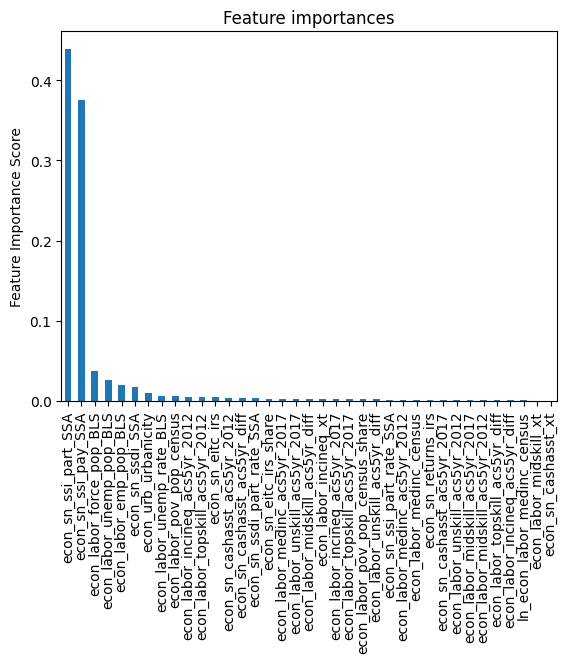

In [92]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [136]:
rf_feat = ( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()
rf_feat

econ_sn_ssi_part_SSA                43.903402
econ_sn_ssi_pay_SSA                 81.441501
econ_labor_force_pop_BLS            85.139247
econ_labor_unemp_pop_BLS            87.802870
econ_labor_emp_pop_BLS              89.748887
econ_sn_ssdi_SSA                    91.494513
econ_urb_urbanicity                 92.433859
econ_labor_unemp_rate_BLS           93.103732
econ_labor_pov_pop_census           93.730041
econ_labor_incineq_acs5yr_2012      94.249106
econ_labor_topskill_acs5yr_2012     94.718483
econ_sn_eitc_irs                    95.185634
econ_sn_cashasst_acs5yr_2012        95.592363
econ_sn_cashasst_acs5yr_diff        95.922052
econ_sn_ssdi_part_rate_SSA          96.248249
econ_sn_eitc_irs_share              96.529523
econ_labor_medinc_acs5yr_2017       96.787932
econ_labor_unskill_acs5yr_2017      97.046002
econ_labor_midskill_acs5yr_diff     97.296800
econ_labor_incineq_xt               97.543068
econ_labor_incineq_acs5yr_2017      97.779784
econ_labor_topskill_acs5yr_2017   

In [94]:
filter = (rf_feat <= 95)

In [95]:
to_keep = rf_feat[filter].index.to_list()

In [96]:
rf_features_df = X[to_keep]

In [97]:
rf_features_df

econ_sn_ssi_part_SSA  econ_sn_ssi_pay_SSA  econ_labor_force_pop_BLS  \
0                     5354                 2732                    153834   
1                     5535                 2872                    157923   
2                     5774                 2951                    159006   
3                     5992                 3130                    158380   
4                     5832                 3063                    158401   
...                    ...                  ...                       ...   
3003                  6708                 3404                    307272   
3004                  6888                 3529                    306611   
3005                  6786                 3509                    306332   
3006                  6697                 3485                    304774   
3007                  6723                 3625                    300923   

      econ_labor_unemp_pop_BLS  econ_labor_emp_pop_BLS  econ_sn_ssdi_SSA  \
0                        10028                  143806              4735   
1                        10384                  147539              5040   
2                         9464                  149542              5315   
3                         8483                  149897              5320   
4                         8232                  150169              5230   
...                        ...                     ...               ...   
3003                     16337                  290935             12775   
3004                     14479                  292132             13105   
3005                     12675                  293657             13170   
3006                     13088                  291686             13255   
3007                     15868                  285055             13325   

      econ_urb_urbanicity  econ_labor_unemp_rate_BLS  \
0                       3                   6.518715   
1                       3                   6.575356   
2                       3                   5.951977   
3                       3                   5.356105   
4                       3                   5.196937   
...                   ...                        ...   
3003                    1                   5.316788   
3004                    1                   4.722270   
3005                    1                   4.137668   
3006                    1                   4.294330   
3007                    1                   5.273109   

      econ_labor_pov_pop_census  econ_labor_incineq_acs5yr_2012  \
0                         21109                       41.320000   
1                         27351                       41.320000   
2                         24409                       41.320000   
3                         26220                       41.320000   
4                         22753                       41.320000   
...                         ...                             ...   
3003                      66877                       41.425655   
3004                      62119                       41.425655   
3005                      63860                       41.425655   
3006                      60786                       41.425655   
3007                      62415                       41.425655   

      econ_labor_topskill_acs5yr_2012  
0                           97.508820  
1                           97.508820  
2                           97.508820  
3                           97.508820  
4                           97.508820  
...                               ...  
3003                        98.065987  
3004                        98.065987  
3005                        98.065987  
3006                        98.065987  
3007                        98.065987  

[3008 rows x 11 columns]

In [98]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 50

mean_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(rf_features_df, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'CV RMSE: {np.sqrt(mean_error).mean()}')
print(f'CV RMSE_std: {np.sqrt(mean_error).std()}')
np.sqrt(mean_error)[:50]

CV RMSE: 707.2608134024177
CV RMSE_std: 194.19936914208634


array([ 750.04081464,  539.59118889,  486.79033099,  430.75621471,
        737.30514489, 1185.77291822,  837.55072137,  806.89169544,
        653.64367017,  484.99218449,  699.6249763 ,  827.40285887,
        564.62532046,  544.96294999,  784.27166759,  758.06312645,
        788.77676425,  633.12446223,  585.34505682,  540.85427745,
        641.7951711 ,  458.86139255,  803.18823111, 1575.59099066,
        665.69634174,  569.55911322,  871.51375411,  660.70952298,
        678.69591708,  581.98541573, 1078.35578003,  835.02239294,
        715.18150375,  655.31833548,  581.8063747 ,  634.85418999,
        751.57633515,  628.83566346,  711.21187974,  597.82016731,
        510.94211951,  601.75934528,  861.14310143,  580.09176351,
        895.22437329,  835.22665364,  625.5117098 ,  778.66147166,
        513.73587923,  822.77943571])

## CV RMSE: 707.2608134024177  CV RMSE_std: 194.19936914208634

# XGBoost

In [99]:
numLoops = 50
mse_xgb  = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)


print(f'CV RMSE: {np.sqrt(mse_xgb).mean()}')

CV RMSE: 831.1663341535099


## CV RMSE: 719.4429861730938

In [100]:
y_pred_xgb[0]

374.65402

In [101]:
y_test.to_numpy()[0]

131.0

In [102]:
# Specify the parameters we want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 140}


In [103]:
# Fitting model with best parameters
numLoops = 50
mse_xgb  = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.1,
      max_depth = 6,
      n_estimators = 140,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'CV RMSE: {np.sqrt(mse_xgb).mean()}')

CV RMSE: 818.2620855803339


## CV RMSE: 760.286247861608

## Feature selection

<ipython-input-104-16d4b8a6cfd6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


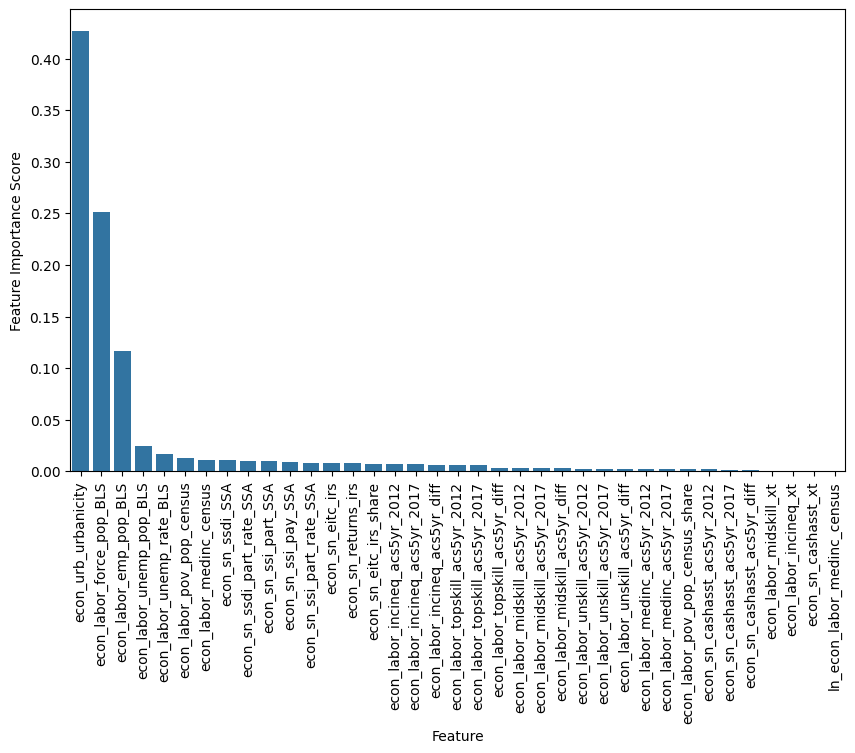

In [104]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns)
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp.sort_values( ascending = False ).values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;

In [105]:
xgboost_features = (feat_imp.sort_values( ascending = False )*100).cumsum()
xgboost_features

econ_labor_force_pop_BLS           42.618935
econ_urb_urbanicity                67.734375
econ_labor_emp_pop_BLS             79.367607
econ_sn_ssi_pay_SSA                81.842628
econ_sn_cashasst_acs5yr_2012       83.549377
econ_labor_incineq_acs5yr_2012     84.888634
econ_labor_pov_pop_census_share    85.986916
econ_sn_ssi_part_rate_SSA          87.067490
econ_labor_medinc_acs5yr_2017      88.113083
econ_labor_topskill_acs5yr_2012    89.111168
econ_sn_ssdi_SSA                   90.029694
econ_sn_cashasst_acs5yr_diff       90.859695
econ_labor_unskill_acs5yr_2012     91.675140
econ_labor_medinc_acs5yr_2012      92.480713
econ_labor_topskill_acs5yr_2017    93.223892
econ_labor_midskill_acs5yr_diff    93.919868
econ_labor_pov_pop_census          94.596931
econ_labor_incineq_acs5yr_2017     95.253464
econ_labor_incineq_acs5yr_diff     95.885475
econ_labor_unemp_pop_BLS           96.474632
econ_labor_unskill_acs5yr_2017     96.824799
econ_sn_ssdi_part_rate_SSA         97.171417
econ_labor

In [106]:
filter = xgboost_features <= 97

In [107]:
to_keep = rf_feat[filter].index.to_list()

In [108]:
xg_features_df = X[to_keep]

In [109]:
xg_features_df

econ_sn_ssi_pay_SSA  econ_labor_force_pop_BLS  econ_labor_unemp_pop_BLS  \
0                    2732                    153834                     10028   
1                    2872                    157923                     10384   
2                    2951                    159006                      9464   
3                    3130                    158380                      8483   
4                    3063                    158401                      8232   
...                   ...                       ...                       ...   
3003                 3404                    307272                     16337   
3004                 3529                    306611                     14479   
3005                 3509                    306332                     12675   
3006                 3485                    304774                     13088   
3007                 3625                    300923                     15868   

      econ_labor_emp_pop_BLS  econ_sn_ssdi_SSA  econ_urb_urbanicity  \
0                     143806              4735                    3   
1                     147539              5040                    3   
2                     149542              5315                    3   
3                     149897              5320                    3   
4                     150169              5230                    3   
...                      ...               ...                  ...   
3003                  290935             12775                    1   
3004                  292132             13105                    1   
3005                  293657             13170                    1   
3006                  291686             13255                    1   
3007                  285055             13325                    1   

      econ_labor_pov_pop_census  econ_labor_incineq_acs5yr_2012  \
0                         21109                       41.320000   
1                         27351                       41.320000   
2                         24409                       41.320000   
3                         26220                       41.320000   
4                         22753                       41.320000   
...                         ...                             ...   
3003                      66877                       41.425655   
3004                      62119                       41.425655   
3005                      63860                       41.425655   
3006                      60786                       41.425655   
3007                      62415                       41.425655   

      econ_labor_topskill_acs5yr_2012  econ_sn_cashasst_acs5yr_2012  ...  \
0                           97.508820                      6.401073  ...   
1                           97.508820                      6.401073  ...   
2                           97.508820                      6.401073  ...   
3                           97.508820                      6.401073  ...   
4                           97.508820                      6.401073  ...   
...                               ...                           ...  ...   
3003                        98.065987                      1.615485  ...   
3004                        98.065987                      1.615485  ...   
3005                        98.065987                      1.615485  ...   
3006                        98.065987                      1.615485  ...   
3007                        98.065987                      1.615485  ...   

      econ_labor_medinc_acs5yr_2017  econ_labor_unskill_acs5yr_2017  \
0                      80862.000000                       88.882874   
1                      80862.000000                       88.882874   
2                      80862.000000                       88.882874   
3                      80862.000000                       88.882874   
4                      80862.000000                       88.882874   
...                             ... 

In [110]:
numLoops = 50
mse_xgb  = np.zeros(numLoops)

np.random.seed(1)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(xg_features_df,y,test_size=0.20)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)


print(f'CV RMSE: {np.sqrt(mse_xgb).mean()}')

CV RMSE: 762.8364634677912


## CV RMSE: 740.1512139224631

In [111]:
y_test.describe().transpose()

count      602.000000
mean      1345.473422
std       2406.929709
min         14.000000
25%        332.750000
50%        698.000000
75%       1495.500000
max      44359.000000
Name: pit_tot_hless_pit_hud, dtype: float64

In [112]:
# Descriptive statistics of y_pred to troubleshoot why we aren't able to successfully calculate a RMSPE for everything above
mean = np.mean(y_pred)
std_dev = np.std(y_pred)
minimum = np.min(y_pred)
maximum = np.max(y_pred)
percentiles = np.percentile(y_pred, [25, 50, 75])

# Print the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Min: {minimum}")
print(f"25th Percentile: {percentiles[0]}")
print(f"Median (50th Percentile): {percentiles[1]}")
print(f"75th Percentile: {percentiles[2]}")
print(f"Max: {maximum}")


Mean: 1693.4873754152823
Standard Deviation: 4722.531171587757
Min: 12.1
25th Percentile: 398.425
Median (50th Percentile): 756.1
75th Percentile: 1528.875
Max: 68035.1


In [113]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100

rmspe(y_test, y_pred)

1347.748292419708

In [114]:
xgboost_features[filter].index.to_list()

['econ_labor_force_pop_BLS',
 'econ_urb_urbanicity',
 'econ_labor_emp_pop_BLS',
 'econ_sn_ssi_pay_SSA',
 'econ_sn_cashasst_acs5yr_2012',
 'econ_labor_incineq_acs5yr_2012',
 'econ_labor_pov_pop_census_share',
 'econ_sn_ssi_part_rate_SSA',
 'econ_labor_medinc_acs5yr_2017',
 'econ_labor_topskill_acs5yr_2012',
 'econ_sn_ssdi_SSA',
 'econ_sn_cashasst_acs5yr_diff',
 'econ_labor_unskill_acs5yr_2012',
 'econ_labor_medinc_acs5yr_2012',
 'econ_labor_topskill_acs5yr_2017',
 'econ_labor_midskill_acs5yr_diff',
 'econ_labor_pov_pop_census',
 'econ_labor_incineq_acs5yr_2017',
 'econ_labor_incineq_acs5yr_diff',
 'econ_labor_unemp_pop_BLS',
 'econ_labor_unskill_acs5yr_2017']

In [115]:
xgfeat_set = set(xgboost_features[filter].index.to_list())

In [116]:
# Fit linear regression model w/ just predictors high correlation with target
corrs = df_econ.corr()['pit_tot_hless_pit_hud'].abs().sort_values(ascending = False)
keep_df_econ = corrs[(corrs>.2) & (corrs <1)]
keep_df_econ_list = keep_df_econ.index.to_list()

In [117]:
# Features common to both
set(keep_df_econ_list).intersection(xgfeat_set)

{'econ_labor_emp_pop_BLS',
 'econ_labor_force_pop_BLS',
 'econ_labor_incineq_acs5yr_2012',
 'econ_labor_incineq_acs5yr_2017',
 'econ_labor_pov_pop_census',
 'econ_labor_topskill_acs5yr_2012',
 'econ_labor_unemp_pop_BLS',
 'econ_sn_ssdi_SSA',
 'econ_sn_ssi_pay_SSA',
 'econ_urb_urbanicity'}

In [118]:
# What is in Correlation matrix importance and not XGBoost
set(keep_df_econ_list) - (xgfeat_set)

{'econ_sn_eitc_irs', 'econ_sn_returns_irs', 'econ_sn_ssi_part_SSA'}

In [119]:
# What's in XGBoost and not in correlation matrix
(xgfeat_set) - set(keep_df_econ_list)

{'econ_labor_incineq_acs5yr_diff',
 'econ_labor_medinc_acs5yr_2012',
 'econ_labor_medinc_acs5yr_2017',
 'econ_labor_midskill_acs5yr_diff',
 'econ_labor_pov_pop_census_share',
 'econ_labor_topskill_acs5yr_2017',
 'econ_labor_unskill_acs5yr_2012',
 'econ_labor_unskill_acs5yr_2017',
 'econ_sn_cashasst_acs5yr_2012',
 'econ_sn_cashasst_acs5yr_diff',
 'econ_sn_ssi_part_rate_SSA'}

# Next Steps

In [133]:
import re
import open_workbook

In [120]:
url = 'https://github.com/janel-dsbc/capstone/raw/main/data/2007_2023_HUD_Homeless_State_PIT_Counts.xlsb'
xls_file = 'boo.xls'

In [121]:
url1 = ('https://github.com/janel-dsbc/capstone/raw/main/data/2007_2023_HUD_Housing_State_Inventory_Counts.xlsx')

df = pd.read_excel((url1), sheet_name = '2023', header = [0,1])

In [129]:
url2 = ('https://github.com/janel-dsbc/capstone/raw/main/data/PovertyReport.xlsx')

url3 = ('https://github.com/janel-dsbc/capstone/raw/main/data/labforce_20180100.csv')

url4 = ('https://github.com/janel-dsbc/capstone/raw/main/data/labforce_20200100.csv')

url5 = 'https://github.com/janel-dsbc/capstone/raw/main/data/labforce_20230100.csv'


In [122]:
df.columns = df.columns.droplevel(1)

In [123]:
df

Unnamed: 0_level_0  Total Beds (ES, TH, SH)  Total Beds (ES, TH, SH)  \
0                  AK                   2308.0                   1769.0   
1                  AL                   2244.0                   1688.0   
2                  AR                   1855.0                   1369.0   
3                  AZ                   7569.0                   6920.0   
4                  CA                  71131.0                  67403.0   
5                  CO                   9192.0                   8629.0   
6                  CT                   2431.0                   2077.0   
7                  DC                   5216.0                   4931.0   
8                  DE                   1317.0                   1247.0   
9                  FL                  18815.0                  16306.0   
10                 GA                   8277.0                   6681.0   
11                 GU                    145.0                     95.0   
12                 HI                   3279.0                   3093.0   
13                 IA                   2630.0                   2222.0   
14                 ID                   1859.0                   1497.0   
15                 IL                  11953.0                  10499.0   
16                 IN                   6341.0                   4976.0   
17                 KS                   2260.0                   1666.0   
18                 KY                   3639.0                   3040.0   
19                 LA                   2348.0                   1995.0   
20                 MA                  17971.0                  17163.0   
21                 MD                   5971.0                   5554.0   
22                 ME                   4238.0                   3974.0   
23                 MI                   8833.0                   6756.0   
24                 MN                   7569.0                   6580.0   
25                 MO                   6096.0                   4580.0   
26                 MP                      NaN                      NaN   
27                 MS                    826.0                    592.0   
28                 MT                   1787.0                   1524.0   
29                 NC                   7470.0                   6346.0   
30                 ND                    823.0                    484.0   
31                 NE                   2817.0                   2443.0   
32                 NH                   2601.0                   2482.0   
33                 NJ                   5876.0                   5174.0   
34                 NM                   3475.0                   2856.0   
35                 NV                   4395.0                   4052.0   
36                 NY                 103864.0                  99079.0   
37                 OH                   9516.0                   7919.0   
38                 OK                   3404.0                   2848.0   
39                 OR                   7591.0                   7335.0   
40                 PA                  12691.0                  11081.0   
41                 PR                    770.0                    579.0   
42                 RI                   1092.0                    903.0   
43                 SC                   3119.0                   2656.0   
44                 SD                   1221.0                    874.0   
45                 TN                   5129.0                   4293.0   
46                 TX                  20267.0                  16374.0   
47                 UT                   2905.0                   1995.0   
48                 VA                   4952.0                   3852.0   
49                 VI                     69.0                     69.0   
50                 VT                   2857.0                   2652.0   
51                 WA                  17955.0                  16509.0   
52                 WI       

In [128]:
df1

year  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0     2010                 1113.0                    118.0   
1     2011                 1082.0                    141.0   
2     2012                 1097.0                     50.0   
3     2013                 1070.0                     52.0   
4     2014                  970.0                     53.0   
...    ...                    ...                      ...   
3003  2013                  501.0                    452.0   
3004  2014                  563.0                    194.0   
3005  2015                  507.0                    291.0   
3006  2016                  491.0                    366.0   
3007  2017                  510.0                    363.0   

      pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
0                    1231.0                  633.0                    107.0   
1                    1223.0                  677.0                    117.0   
2                    1147.0                  756.0                     35.0   
3                    1122.0                  792.0                     52.0   
4                    1023.0                  688.0                     48.0   
...                     ...                    ...                      ...   
3003                  953.0                  306.0                    371.0   
3004                  757.0                  327.0                    136.0   
3005                  798.0                  292.0                    208.0   
3006                  857.0                  277.0                    240.0   
3007                  873.0                  383.0                    239.0   

      pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
0                     740.0                     480.0   
1                     794.0                     405.0   
2                     791.0                     341.0   
3                     844.0                     278.0   
4                     736.0                     282.0   
...                     ...                       ...   
3003                  677.0                     195.0   
3004                  463.0                     236.0   
3005                  500.0                     215.0   
3006                  517.0                     214.0   
3007                  622.0                     127.0   

      pit_perfam_unshelt_pit_hud  pit_perfam_hless_pit_hud  ...  \
0                           11.0                     491.0  ...   
1                           24.0                     429.0  ...   
2                           15.0                     356.0  ...   
3                            0.0                     278.0  ...   
4                            5.0                     287.0  ...   
...                          ...                       ...  ...   
3003                        81.0                     276.0  ...   
3004                        58.0                     294.0  ...   
3005                        83.0                     298.0  ...   
3006                       126.0                     340.0  ...   
3007                       124.0                     251.0  ...   

      sub_high_cost_rent75  sub_high_cost_homeval75  sub_high_rent_share75  \
0                        1                        1                      1   
1                        1                        1                      0   
2                        1                        1                      1   
3                        1                        1                      0   
4                        1                        1                      1   
...                    ...                      ...                    ...   
3003                     0                        0                      0   
3004                     1                        1                      1   
3005                     0                        0                      0   
3006                     1                

In [130]:
df2 = pd.read_excel(url2, header = [0,1,2,3,4])

In [131]:
sample = df2.columns.map('_'.join)[7]
sample

'Unnamed: 7_level_0_Number_All people in poverty (2021)_90% confidence interval of estimate_Lower Bound'

In [134]:
pattern = re.compile(r'_?Unnamed: \d_level_\d_?')
df2.columns = [pattern.sub('', sample)
  for sample in df2.columns.map('_'.join)]

In [135]:
len(df2.columns)

12

In [ ]:
df2a = df2.iloc[:34,[0,3,5,6,7,8,9,10,11]]

In [ ]:
df2a

In [ ]:
url3 = ('https://github.com/janel-dsbc/capstone/raw/main/data/labforce_20180100.csv')
df3 = pd.read_csv(url3)
df3

In [ ]:
with open_workbook( xls_file ) as wb:
    sheet_names = wb.sheets
sheet_names

In [ ]:
!file boo.xls

In [ ]:
# Create a dictionary to hold the DataFrames
dfs = {}

# Open the workbook and read each sheet into a DataFrame
with open_workbook( xls_file ) as wb:
    for sheet_name in wb.sheets:
        dfs[sheet_name] = pd.read_excel( xls_file, sheet_name=sheet_name, engine='pyxlsb')

In [ ]:
# Display the keys (sheet names) and the first few rows of each DataFrame
for sheet, df in dfs.items():
    print(f"=== Sheet name: {sheet}")
    df["sheet_name"] = sheet
    print(df.iloc[:10, :3], "\n")
    print("\n\n\n")


In [ ]:
dfs["2020"].head()